In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cmcrameri
import cmcrameri.cm as cmc
from scipy.stats import pearsonr
from PIL import Image
import matplotlib.patches as mpatches

In [2]:
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log_combined_Chao_Shen.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log_combined_Chao_Shen.csv")

# Split 'Filename' into 'SubjectID' and 'SessionNr'
# Split 'Filename' into 'ParticipantID' and 'SessionNr'
data_1[['ParticipantID', 'SessionNr']] = data_1['Filename'].str.replace('.csv', '', regex=False).str.split('_', expand=True)
data_2[['ParticipantID', 'SessionNr']] = data_2['Filename'].str.replace('.csv', '', regex=False).str.split('_', expand=True)
# Drop the original 'Filename' column
data_1.drop(columns=['Filename'], inplace=True)
data_2.drop(columns=['Filename'], inplace=True)
data_1.drop_duplicates(inplace=True)
data_2.drop_duplicates(inplace=True)
# Convert SessionNr to integer if possible
data_1['SessionNr'] = pd.to_numeric(data_1['SessionNr'], errors='coerce')
data_2['SessionNr'] = pd.to_numeric(data_2['SessionNr'], errors='coerce')

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                   

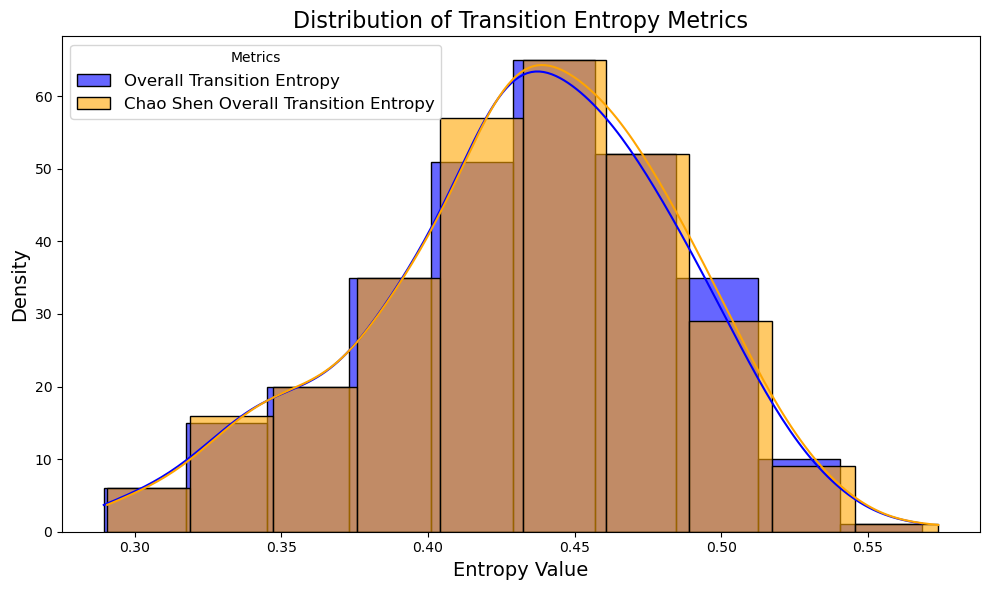

In [3]:
# Plotting the distribution of the first two columns
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df["Overall_Transition_Entropy"], kde=True, label="Overall Transition Entropy", color="blue", bins=10, alpha=0.6)
sns.histplot(stacked_df["Chao_Shen_Overall_Transition_Entropy"], kde=True, label="Chao Shen Overall Transition Entropy", color="orange", bins=10, alpha=0.6)

# Customize the plot
plt.title("Distribution of Transition Entropy Metrics", fontsize=16)
plt.xlabel("Entropy Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

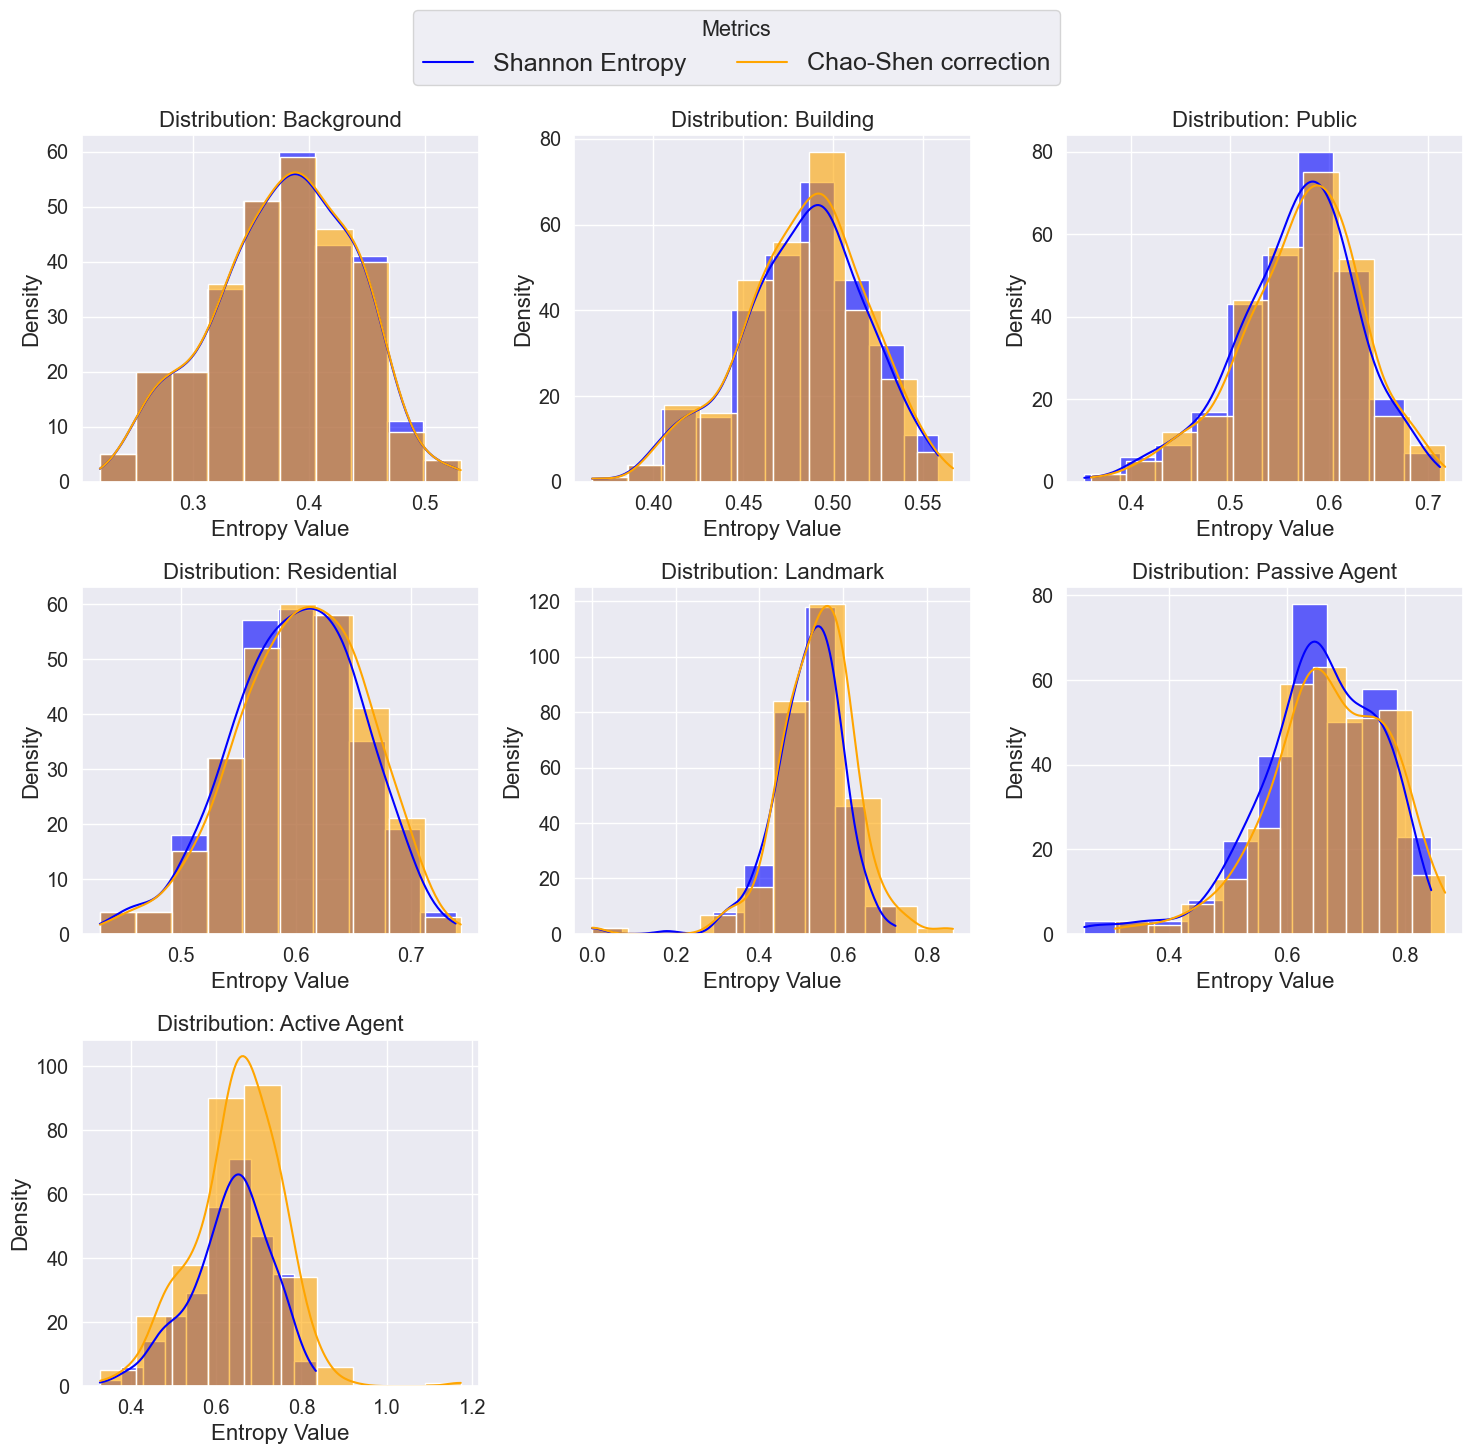

In [73]:
# Define pairs of columns: one with and one without the "Chao_Shen_" prefix
column_pairs = [
    ("Transition_Entropy_Background", "Chao_Shen_Transition_Entropy_Background"),
    ("Transition_Entropy_Building", "Chao_Shen_Transition_Entropy_Building"),
    ("Transition_Entropy_TaskBuilding_Public", "Chao_Shen_Transition_Entropy_TaskBuilding_Public"),
    ("Transition_Entropy_TaskBuilding_Residential", "Chao_Shen_Transition_Entropy_TaskBuilding_Residential"),
    ("Transition_Entropy_Global_Landmark", "Chao_Shen_Transition_Entropy_Global_Landmark"),
    ("Transition_Entropy_Passive_Agent", "Chao_Shen_Transition_Entropy_Passive_Agent"),
    ("Transition_Entropy_Active_Agent", "Chao_Shen_Transition_Entropy_Active_Agent"),
]



# Create a grid layout with multiple plots per row
cols_per_row = 3  # Number of plots per row
num_rows = -(-len(column_pairs) // cols_per_row)  # Calculate number of rows needed

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Adjust figure size based on grid layout
for idx, (col, chao_col) in enumerate(column_pairs, 1):
    plt.subplot(num_rows, cols_per_row, idx)
    sns.histplot(stacked_df[col], kde=True, label="Shannon Entropy", color="blue", bins=10, alpha=0.6)
    sns.histplot(stacked_df[chao_col], kde=True, label="Chao-Shen correction", color="orange", bins=10, alpha=0.6)

    # Extract the word for the title, handle special case for "agent"
    col_split = col.split("_")
    if col_split[-1].lower() == "agent":
        title_word = "_".join(col_split[-2:]).replace("_", " ")
    else:
        title_word = col_split[-1]
    plt.title(f"Distribution: {title_word}", fontsize=16)
    plt.xlabel("Entropy Value", fontsize=16)
    plt.ylabel("Density", fontsize=16)

# Add a legend outside of the figure, centered above all subplots
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.figlegend(title="Metrics", labels=["Shannon Entropy", "Chao-Shen correction"], loc="upper center", bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=18)
plt.show()

In [5]:
stacked_df

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                      0.457551                              0.458699   
1                      0.470105                              0.471462   
2                      0.457947                              0.458960   
3                      0.418186                              0.418806   
4                      0.437667                              0.438649   
..                          ...                                   ...   
285                    0.427829                              0.428917   
286                    0.423143                              0.424185   
287                    0.423564                              0.424601   
288                    0.425527                              0.426047   
289                    0.395111                              0.396305   

     Transition_Entropy_Background  Transition_Entropy_Building  \
0                         0.411175                     0.529599   
1                         0.404550                     0.536949   
2                         0.389115                     0.528524   
3                         0.409746                     0.421414   
4                         0.444608                     0.450309   
..                             ...                          ...   
285                       0.382901                     0.441668   
286                       0.385164                     0.398692   
287                       0.365968                     0.456940   
288                       0.347731                     0.499128   
289                       0.332132                     0.474281   

     Transition_Entropy_TaskBuilding_Public  \
0                                  0.573622   
1                                  0.621863   
2                                  0.639823   
3                                  0.408450   
4                                  0.407788   
..                                      ...   
285                                0.569828   
286                                0.541538   
287                                0.444654   
288                                0.607639   
289                                0.618101   

     Transition_Entropy_TaskBuilding_Residential  \
0                                       0.598749   
1                                       0.624224   
2                                       0.603179   
3                                       0.450897   
4                                       0.429398   
..                                           ...   
285                                     0.595332   
286                                     0.629369   
287                                     0.518001   
288                                     0.708668   
289                                     0.641719   

     Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                              0.551024                          0.419706   
1                              0.612049                          0.475617   
2                              0.658797                          0.516636   
3                              0.375698                          0.394601   
4                              0.325598                          0.459708   
..                                  ...                               ...   
285                            0.443013                          0.728604   
286                            0.629214                          0.674959   
287                            0.591785                          0.642071   
288                            0.525995                          0.707599   
289                            0.408722                          0.744966   

     Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                           0.394916                                 0.411175   
1                           0.589565          

In [6]:
stacked_df.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.394916   
1  ...                                   0.601919   
2  ...                                   0.738672   
3  ...                                   0.638640   
4  ...                                   0.650746   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.171067                     0.149436   
1                       0.159033                     0.169368   
2                       0.153467                     0.171652   
3                       0.183415                     0.185106   
4                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0

In [7]:
data_1.head()


Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.394916   
1  ...                                   0.601919   
2  ...                                   0.738672   
3  ...                                   0.638640   
4  ...                                   0.650746   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.171067                     0.149436   
1                       0.159033                     0.169368   
2                       0.153467                     0.171652   
3                       0.183415                     0.185106   
4                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0

In [8]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         345 non-null    object 
 1   SessionNr             345 non-null    int64  
 2   IndividualNodeCount   345 non-null    int64  
 3   Experiment            345 non-null    object 
 4   CummulativeNodeCount  345 non-null    int64  
 5   IndividualRatio       345 non-null    float64
 6   CummulativeRatio      345 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.0+ KB


None

ParticipantId  Session  StrategyCount  StrategyPerc      Strategy  \
0           1754        1            7.0          0.22  Conservative   
1           1754        1           25.0          0.78   Explorative   
2           1754        1            6.0          0.24  Conservative   
3           1754        1           19.0          0.76   Explorative   
4           1754        1            2.0          0.12  Conservative   

           Decision  Total Experiment  
0     AgentAtChosen   32.0       Exp1  
1     AgentAtChosen   32.0       Exp1  
2  AgentAtNotChosen   25.0       Exp1  
3  AgentAtNotChosen   25.0       Exp1  
4       AgentAtBoth   17.0       Exp1

In [9]:
data_2.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.435381                              0.436534   
1                    0.423716                              0.424952   
2                    0.473820                              0.474437   
3                    0.493701                              0.494628   
4                    0.425804                              0.426984   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.376847                     0.494797   
1                       0.357604                     0.524897   
2                       0.419146                     0.492363   
3                       0.420797                     0.522262   
4                       0.350460                     0.531039   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.525338   
1                                0.572909   
2                                0.594037   
3                                0.712557   
4                                0.681180   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.571648   
1                                     0.622569   
2                                     0.675835   
3                                     0.738941   
4                                     0.694003   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.514460                          0.775604   
1                            0.463988                          0.694067   
2                            0.540132                          0.559687   
3                            0.632502                          0.582637   
4                            0.519413                          0.657741   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.613399                                 0.376847   
1                         0.597323                                 0.357610   
2                         0.454144                                 0.419146   
3                         0.488316                                 0.420797   
4                         0.470364                                 0.350460   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.631360   
1  ...                                   0.614289   
2  ...                                   0.454146   
3  ...                                   0.490335   
4  ...                                   0.480003   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.157609                     0.171964   
1                       0.140636                     0.165106   
2                       0.174113                     0.173092   
3                       0.168952                     0.158010   
4                       0.137788                     0.148921   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.102136   
1                                0.079361   
2                                0.090841   
3                                0.090322   
4                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0

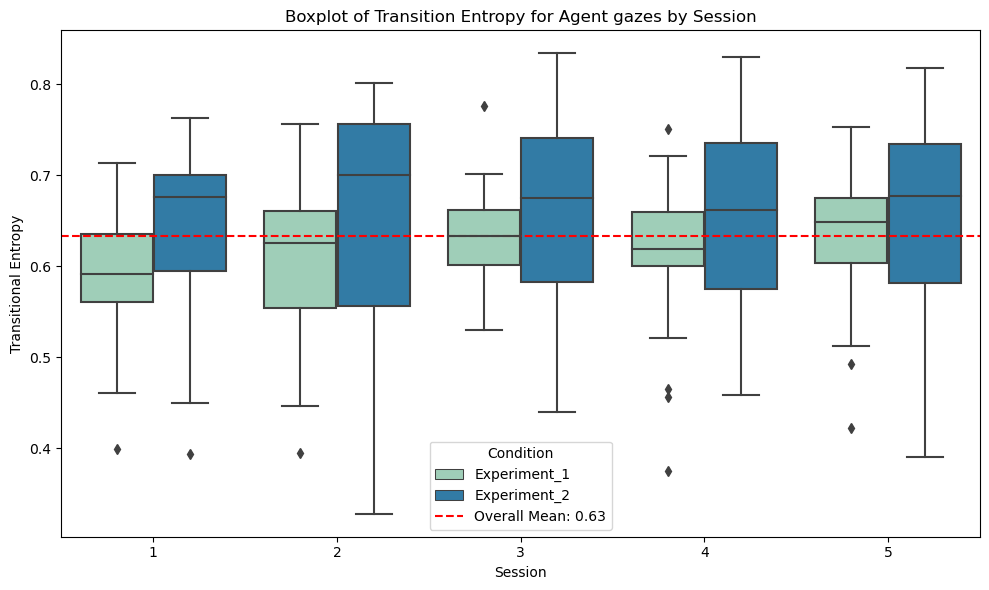

In [10]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [11]:
combined_data.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Stationary_Entropy_Background  Stationary_Entropy_Building  \
0  ...                       0.171067                     0.149436   
1  ...                       0.159033                     0.169368   
2  ...                       0.153467                     0.171652   
3  ...                       0.183415                     0.185106   
4  ...                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0.060542                          0.011966   

   Stationary_Entropy_Active_Agent  ParticipantID  SessionNr    Experiment  
0                         0.106829           0479          2  Experiment_1  
1                         0.037870           0479          3  Experiment_1  
2           

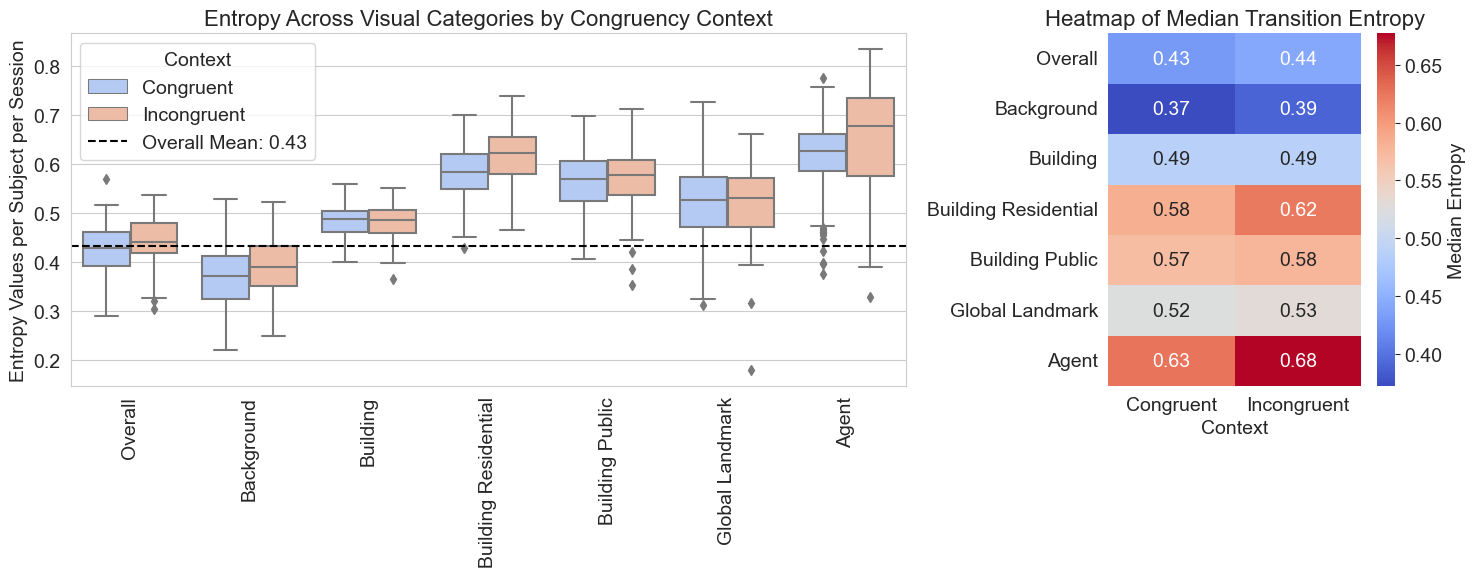

In [12]:
sns.set_style("whitegrid")
# Set a larger font size globally
plt.rcParams.update({
    'font.size': 14,       # Base font size for all text
    'axes.titlesize': 16,  # Font size for axes titles
    'axes.labelsize': 14,  # Font size for axes labels
    'xtick.labelsize': 14, # Font size for x-axis tick labels
    'ytick.labelsize': 14, # Font size for y-axis tick labels
    'legend.fontsize': 14, # Font size for legend
    'figure.titlesize': 18 # Font size for the figure title
})


# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])


# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Overall_Transition_Entropy'].mean()

# Filter combined_data to include only the selected transition entropy columns for the heatmap
selected_columns = [
    'Overall_Transition_Entropy',
    'Transition_Entropy_Background',
    'Transition_Entropy_Building',
    'Transition_Entropy_TaskBuilding_Residential',
    'Transition_Entropy_TaskBuilding_Public',
    'Transition_Entropy_Global_Landmark',
    'Transition_Entropy_Active_Agent',
]

# Prepare heatmap data
def format_labels(label):
    label = label.replace('_', ' ')
    label = label.replace('Transition Entropy', '')
    label = label.replace('TaskBuilding', ' Building')
    label = label.replace('Active', '')
    return label.strip()

heatmap_data = combined_data.groupby(['Condition'])[selected_columns].median()
heatmap_data.columns = [format_labels(col) for col in heatmap_data.columns]

# Melt the DataFrame and filter values greater than 0.01
melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)

# Filter the data
filtered_data = melted_data[melted_data['Entropy_Value'] > 0.01]


# Create a figure with the boxplot on the left and heatmap on the right
fig = plt.figure(figsize=(15, 6))

# Boxplot on the left (takes 2/3 of the width)
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(data=filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax1
)
ax1.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax1.set_title("Entropy Across Visual Categories by Congruency Context")
ax1.set_ylabel("Entropy Values per Subject per Session")
ax1.set_xlabel("")
ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()], rotation=90)
ax1.legend(title="Context")

# Heatmap on the right (takes 1/3 of the width)
ax2 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax2
)
ax2.set_title("Heatmap of Median Transition Entropy")
ax2.set_xlabel("Context")

plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy.png", dpi=600, bbox_inches="tight")
plt.show()

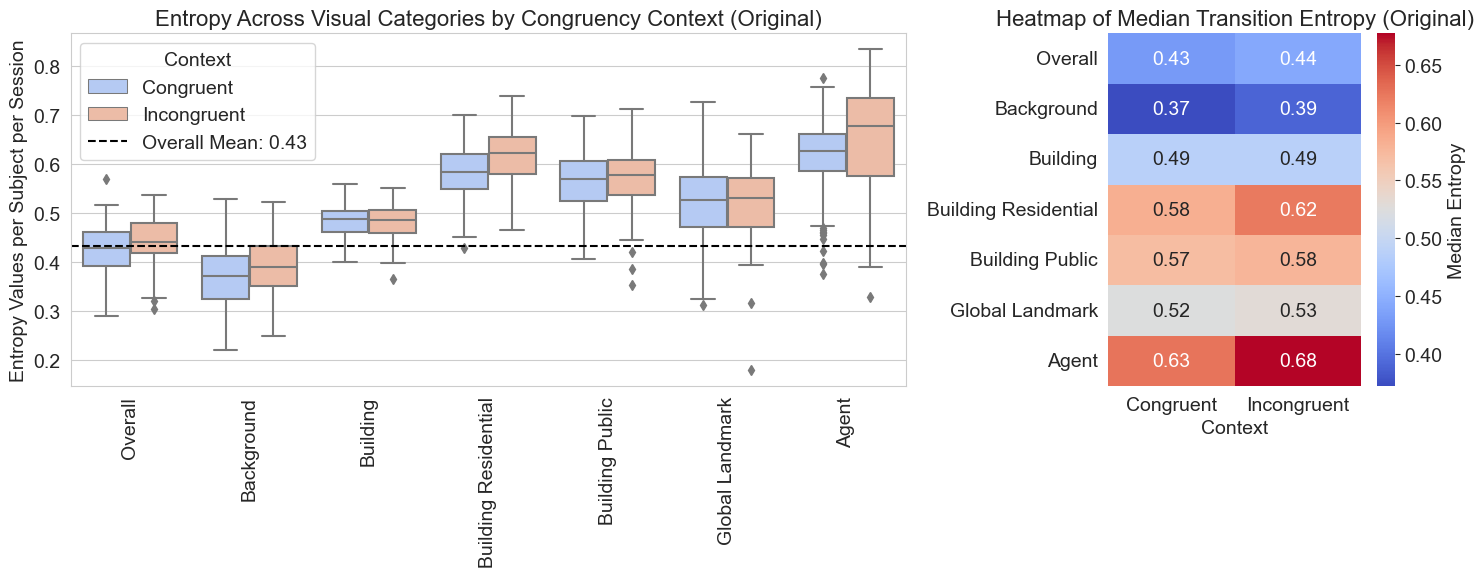

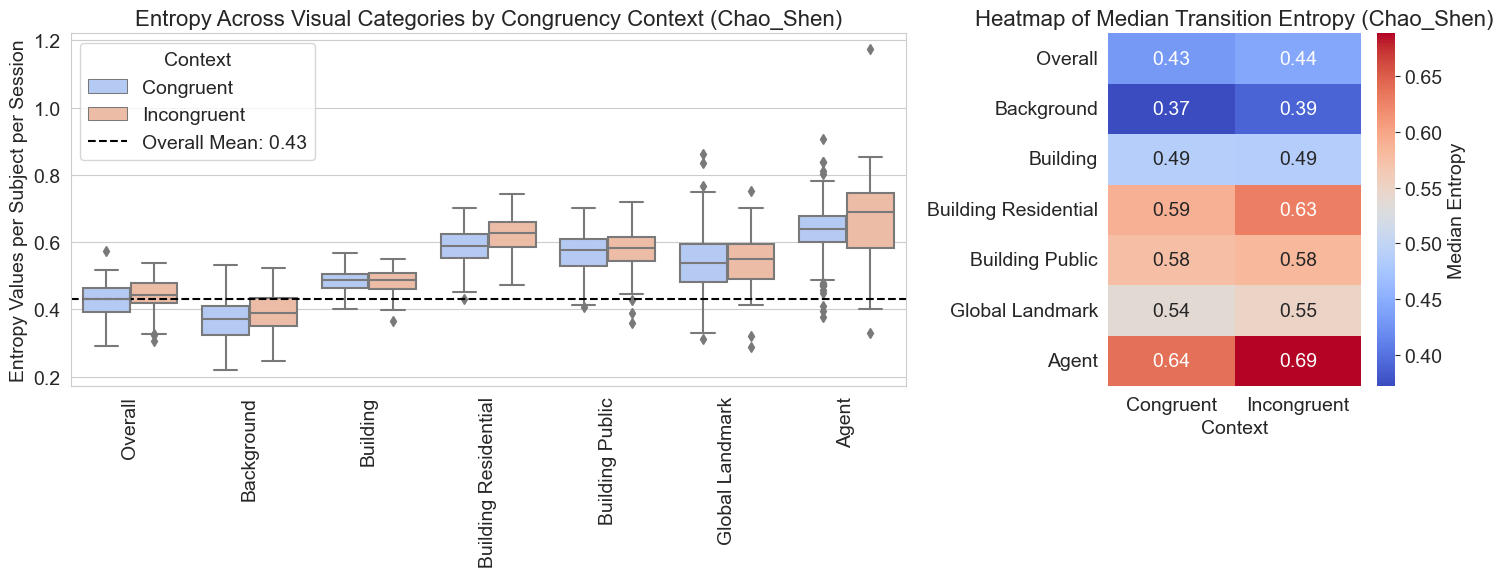

In [13]:
# Original selected columns for comparison
original_selected_columns = [
    'Overall_Transition_Entropy',
    'Transition_Entropy_Background',
    'Transition_Entropy_Building',
    'Transition_Entropy_TaskBuilding_Residential',
    'Transition_Entropy_TaskBuilding_Public',
    'Transition_Entropy_Global_Landmark',
    'Transition_Entropy_Active_Agent',
]

# Update the selected columns to include the 'Chao_Shen_' prefix
chao_shen_selected_columns = [
    'Chao_Shen_Overall_Transition_Entropy',
    'Chao_Shen_Transition_Entropy_Background',
    'Chao_Shen_Transition_Entropy_Building',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Residential',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Public',
    'Chao_Shen_Transition_Entropy_Global_Landmark',
    'Chao_Shen_Transition_Entropy_Active_Agent',
]

# Update format_labels function to handle both sets of labels
def format_labels(label):
    label = label.replace('Chao_Shen_', '')  # Remove prefix for display
    label = label.replace('_', ' ')
    label = label.replace('Transition Entropy', '')
    label = label.replace('TaskBuilding', ' Building')
    label = label.replace('Active', '')
    return label.strip()

# Prepare heatmap data for original columns
original_heatmap_data = combined_data.groupby(['Condition'])[original_selected_columns].median()
original_heatmap_data.columns = [format_labels(col) for col in original_heatmap_data.columns]

# Prepare heatmap data for Chao_Shen columns
chao_shen_heatmap_data = combined_data.groupby(['Condition'])[chao_shen_selected_columns].median()
chao_shen_heatmap_data.columns = [format_labels(col) for col in chao_shen_heatmap_data.columns]

# Melt the DataFrame and filter values greater than 0.01 for both sets of columns
original_melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=original_selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)
original_filtered_data = original_melted_data[original_melted_data['Entropy_Value'] > 0.01]

chao_shen_melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=chao_shen_selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)
chao_shen_filtered_data = chao_shen_melted_data[chao_shen_melted_data['Entropy_Value'] > 0.01]

# Create the first figure for original columns
plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(
    data=original_filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax1
)
ax1.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax1.set_title("Entropy Across Visual Categories by Congruency Context (Original)")
ax1.set_ylabel("Entropy Values per Subject per Session")
ax1.set_xlabel("")
ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()], rotation=90)
ax1.legend(title="Context")

ax2 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    original_heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax2
)
ax2.set_title("Heatmap of Median Transition Entropy (Original)")
ax2.set_xlabel("Context")
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_original.png", dpi=600, bbox_inches="tight")
plt.show()

# Create the second figure for Chao_Shen columns
plt.figure(figsize=(15, 6))
ax3 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(
    data=chao_shen_filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax3
)
ax3.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax3.set_title("Entropy Across Visual Categories by Congruency Context (Chao_Shen)")
ax3.set_ylabel("Entropy Values per Subject per Session")
ax3.set_xlabel("")
ax3.set_xticklabels([format_labels(tick.get_text()) for tick in ax3.get_xticklabels()], rotation=90)
ax3.legend(title="Context")

ax4 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    chao_shen_heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax4
)
ax4.set_title("Heatmap of Median Transition Entropy (Chao_Shen)")
ax4.set_xlabel("Context")
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_chao_shen.png", dpi=600, bbox_inches="tight")
plt.show()


## Introduction of dwelling times

In [14]:
Fixation_data_Exp1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Session_Exp1.cvs")
Fixation_data_Exp1["Experiment"] = 1
Fixation_data_Exp2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Sessions_Exp2.cvs")
Fixation_data_Exp2["Experiment"] = 2

# Stack the two datasets on top of each other (concatenate rows)
Fixation_data_stacked = pd.concat([Fixation_data_Exp1, Fixation_data_Exp2], ignore_index=True)
Fixation_data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20782 entries, 0 to 20781
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20782 non-null  int64  
 1   SubjectID              20782 non-null  int64  
 2   Session                20782 non-null  int64  
 3   recoded                20782 non-null  object 
 4   Collider_CategoricalN  20782 non-null  object 
 5   Dwelling_Time          20782 non-null  float64
 6   Fixation_Count         20782 non-null  int64  
 7   Experiment             20782 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ MB


In [15]:
Fixation_data_stacked.head()

Unnamed: 0  SubjectID  Session recoded Collider_CategoricalN  \
0           0        365        1  01_Cma          Active_Agent   
1           1        365        1  02_Cma          Active_Agent   
2           2        365        1  05_Cma          Active_Agent   
3           3        365        1  06_Cma          Active_Agent   
4           4        365        1  07_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count  Experiment  
0       0.376960               1           1  
1       0.394320               2           1  
2       0.203856               1           1  
3       0.355629               3           1  
4       0.365552               1           1

In [16]:
Fixations_Grouped = pd.DataFrame(Fixation_data_stacked.groupby(["SubjectID", "Session", "Experiment", "Collider_CategoricalN"]
                                                         )[["Dwelling_Time", "Fixation_Count"]].mean())
Fixations_Building = pd.DataFrame(Fixation_data_stacked.groupby(["SubjectID",  "Experiment", 'recoded',"Collider_CategoricalN"]
)[["Dwelling_Time", "Fixation_Count"]].mean())
Fixations_Grouped.reset_index(inplace=True)
Fixations_Building.reset_index(inplace=True)
# Filter rows where 'Collider_CategoricalN' contains 'Agent'
Fixations_Agent = Fixations_Grouped[Fixations_Grouped['Collider_CategoricalN'].str.contains('Agent')]
# Filter rows where 'Collider_CategoricalN' contains 'Agent' OR 'task'
Fixations_BuildingTask = Fixations_Building[Fixations_Building['Collider_CategoricalN'].str.contains('Task', case=False, na=False)]


# Display the filtered DataFrame
Fixations_Agent.head()

# Ensure the column names match for merging
Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
# Step 1: Ensure columns are of the same data type
Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
Fixations_Agent['SessionNr'] = Fixations_Agent['SessionNr'].astype(str)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/888779036.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/888779036.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/888779036.py:20: SettingWithCopyWarning: 
A value is trying to be set 

In [17]:
Fixations_Building.head()


SubjectID  Experiment recoded Collider_CategoricalN  Dwelling_Time  \
0        365           1  01_Cma          Active_Agent       0.640667   
1        365           1  02_Cma          Active_Agent       1.404009   
2        365           1  05_Cma          Active_Agent       0.229648   
3        365           1  06_Cma          Active_Agent       2.286926   
4        365           1  07_Cma          Active_Agent       0.946988   

   Fixation_Count  
0        1.666667  
1        2.666667  
2        1.000000  
3        4.750000  
4        1.500000

In [18]:
Fixations_Agent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 1406
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ParticipantID          564 non-null    object 
 1   SessionNr              564 non-null    object 
 2   Experiment             564 non-null    int64  
 3   Collider_CategoricalN  564 non-null    object 
 4   Dwelling_Time          564 non-null    float64
 5   Fixation_Count         564 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 30.8+ KB


In [19]:
# Step 1: Create a pivot table
Fixations_Wide = (
    Fixations_Agent
    .pivot_table(
        index=['ParticipantID', 'SessionNr', 'Experiment'],  # Grouping keys
        columns='Collider_CategoricalN',  # Values to pivot
        values=['Dwelling_Time', 'Fixation_Count'],  # Metrics to pivot
        fill_value=0,  # Replace NaN with 0
        aggfunc='sum'  # Aggregate function
    )
)

# Step 2: Flatten the MultiIndex columns for cleaner names
Fixations_Wide.columns = ['_'.join(col).strip() for col in Fixations_Wide.columns.values]

# Step 3: Reset the index to return a clean DataFrame
Fixations_Wide = Fixations_Wide.reset_index()

# Step 4: Display the resulting DataFrame
Fixations_Wide.head()

ParticipantID SessionNr  Experiment  Dwelling_Time_Active_Agent  \
0          1031         1           2                    1.458158   
1          1031         2           2                    2.481094   
2          1031         3           2                    5.283813   
3          1031         4           2                    8.451983   
4          1031         5           2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  
0                      3.769231  
1                      4.500000  
2                     10.875000  
3                     17.000000  
4                     12.714286

In [20]:

# Step 1: Ensure columns are of the same data type
Fixations_Wide['ParticipantID'] = Fixations_Wide['ParticipantID'].astype(str)
combined_data['ParticipantID'] = combined_data['ParticipantID'].astype(str)

Fixations_Wide['SessionNr'] = Fixations_Wide['SessionNr'].astype(str)
combined_data['SessionNr'] = combined_data['SessionNr'].astype(str)

# Merge the two datasets on 'SubjectID', 'Session', and 'Experiment' (adjusting the common key names)
# Perform the merge
combined_data_fixations = pd.merge(Fixations_Wide, combined_data, on=['ParticipantID', 'SessionNr'], how='inner')

# Display the merged dataset
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                    1.458158   
1          1031         2             2                    2.481094   
2          1031         3             2                    5.283813   
3          1031         4             2                    8.451983   
4          1031         5             2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                      3.769231                    0.435381   
1                      4.500000                    0.423716   
2                     10.875000                    0.473820   
3                     17.000000                    0.493701   
4                     12.714286                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [21]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                        

In [22]:
# Specify the columns for correlation analysis
#active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col ) and 'Stationary' not in col]
#passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col) and 'Stationary' not in col]
extra_columns = [ ]

# Further filter for relevant columns in Active and Passive Agents
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter data based on conditions
filtered_congruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Congruent']
filtered_incongruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Incongruent']

# Filter only the required columns for correlation matrices
filtered_active_congruent_data = filtered_congruent[active_columns]
filtered_active_incongruent_data = filtered_incongruent[active_columns]
filtered_passive_data = combined_data_fixations[passive_columns]

# Calculate correlation matrices
corr_matrix_congruent = filtered_active_congruent_data.corr()
corr_matrix_incongruent = filtered_active_incongruent_data.corr()
corr_matrix_passive = filtered_passive_data.corr()


In [23]:
filtered_congruent.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
25          1754         1             1                    0.776706   
26          1754         2             1                    0.989069   
27          1754         3             1                    1.285134   
28          1754         4             1                    0.918292   
29          1754         5             1                    1.315056   

    Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
25                     0.428686                     3.875000   
26                     0.772398                     2.166667   
27                     0.904189                     1.833333   
28                     1.074712                     1.833333   
29                     1.755865                     1.714286   

    Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
25                      1.928571                    0.418186   
26                      1.916667                    0.437667   
27                      2.076923                    0.476741   
28                      1.642857                    0.457486   
29                      2.076923                    0.418219   

    Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
25                              0.418806                       0.409746  ...   
26                              0.438649                       0.444608  ...   
27                              0.477635                       0.456125  ...   
28                              0.458469                       0.409551  ...   
29                              0.418662                       0.354675  ...   

    Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
25                                   0.638640                       0.183415   
26                                   0.650746                       0.184506   
27                                   0.624474                       0.184388   
28                                   0.635560                       0.166101   
29                                   0.654639                       0.147401   

    Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
25                     0.185106                                0.119414   
26                     0.184744                                0.119590   
27                     0.189033                                0.083341   
28                     0.184140                                0.094108   
29                     0.176457                                0.078305   

    Stationary_Entropy_TaskBuilding_Residential  \
25                                     0.109826   
26                                     0.124917   
27                                     0.123803   
28                                     0.087930   
29                                     0.079132   

    Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
25                            0.062524                          0.012740   
26                            0.060542                          0.011966   
27                            0.025637                          0.013694   
28                            0.025855                          0.012002   
29                            0.016937                          0.013793   

    Stationary_Entropy_Active_Agent  Experiment_y  Condition  
25                         0.027955  Experiment_1  Congruent  
26                         0.013087  Experiment_1  Congruent  
27                         0.011026  Experiment_1  Congruent  
28                         0.012002  Experiment_1  Congruent  
29                         0.013794  Experiment_1  Congruent  

[5 rows x 32 columns]

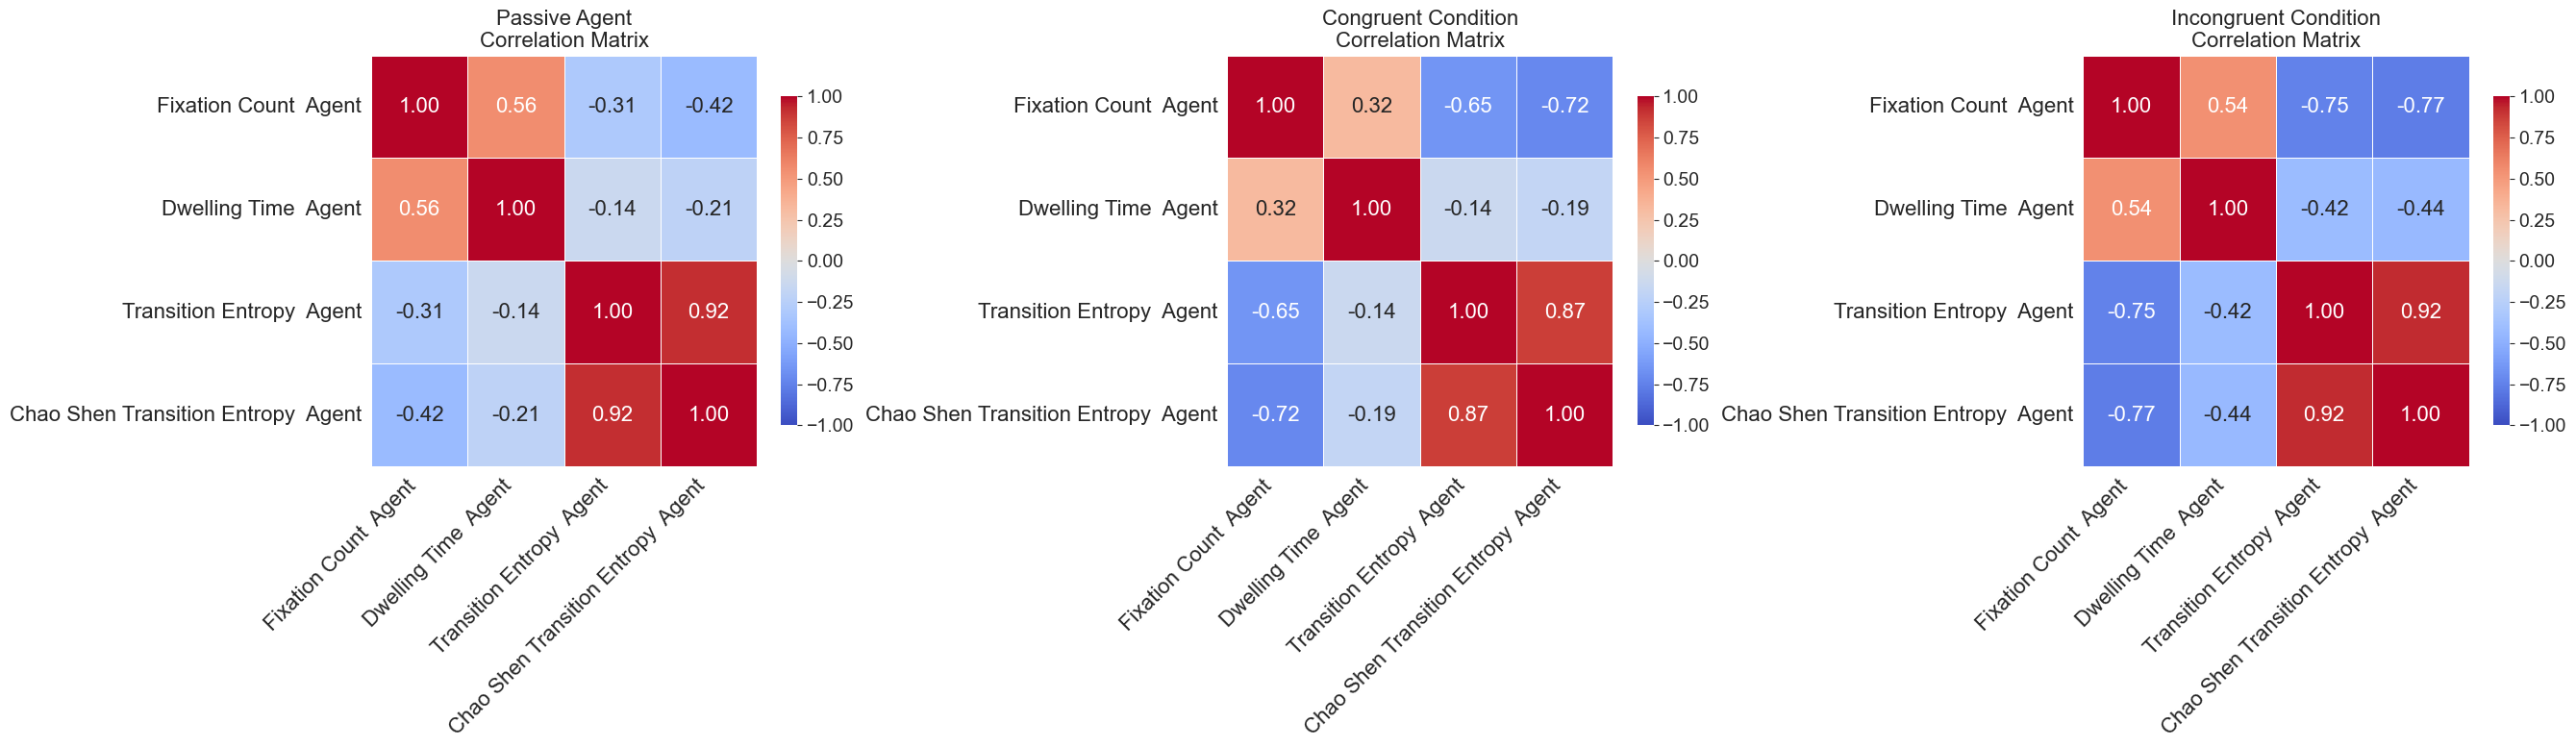

In [24]:


# Define the function to format tick labels
def format_ticks(labels):
    """Modify tick labels to remove unnecessary words and format them."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
        # Remove everything after 'Dwelling Time'
        if 'Dwelling Time' in text:
            text = text.split('Dwelling Time')[0] + 'Dwelling Time'
        # Replace 'TaskBuilding Public' and 'TaskBuilding Residential'
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        # Remove 'Active' and 'Passive'
        text = text.replace('Active', '').replace('Passive', '').strip()
        # Replace underscores with spaces
        text = text.replace('_', ' ')
        formatted_labels.append(text)
    return formatted_labels

# Reorder rows and columns of the correlation matrices
def reorder_matrix(matrix, first_row):
    """Reorder rows and columns in the correlation matrix."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]  # Current second row
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

# Plot the correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Increase figure size for better rendering

# Passive Agent correlation matrix
corr_matrix_passive = reorder_matrix(corr_matrix_passive, "Fixation count")
sns.heatmap(
    corr_matrix_passive,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_passive.isnull(),
    ax=axes[0]
)
axes[0].set_title('Passive Agent\nCorrelation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=16)

# Active Agent - Congruent condition correlation matrix
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent, "Fixation count")
sns.heatmap(
    corr_matrix_congruent,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_congruent.isnull(),
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nCorrelation Matrix', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=16)

# Active Agent - Incongruent condition correlation matrix
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent, "Fixation count")
sns.heatmap(
    corr_matrix_incongruent,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_incongruent.isnull(),
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nCorrelation Matrix', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Updated_Entropy_Correlation_Matrices_HighRes_Improved.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


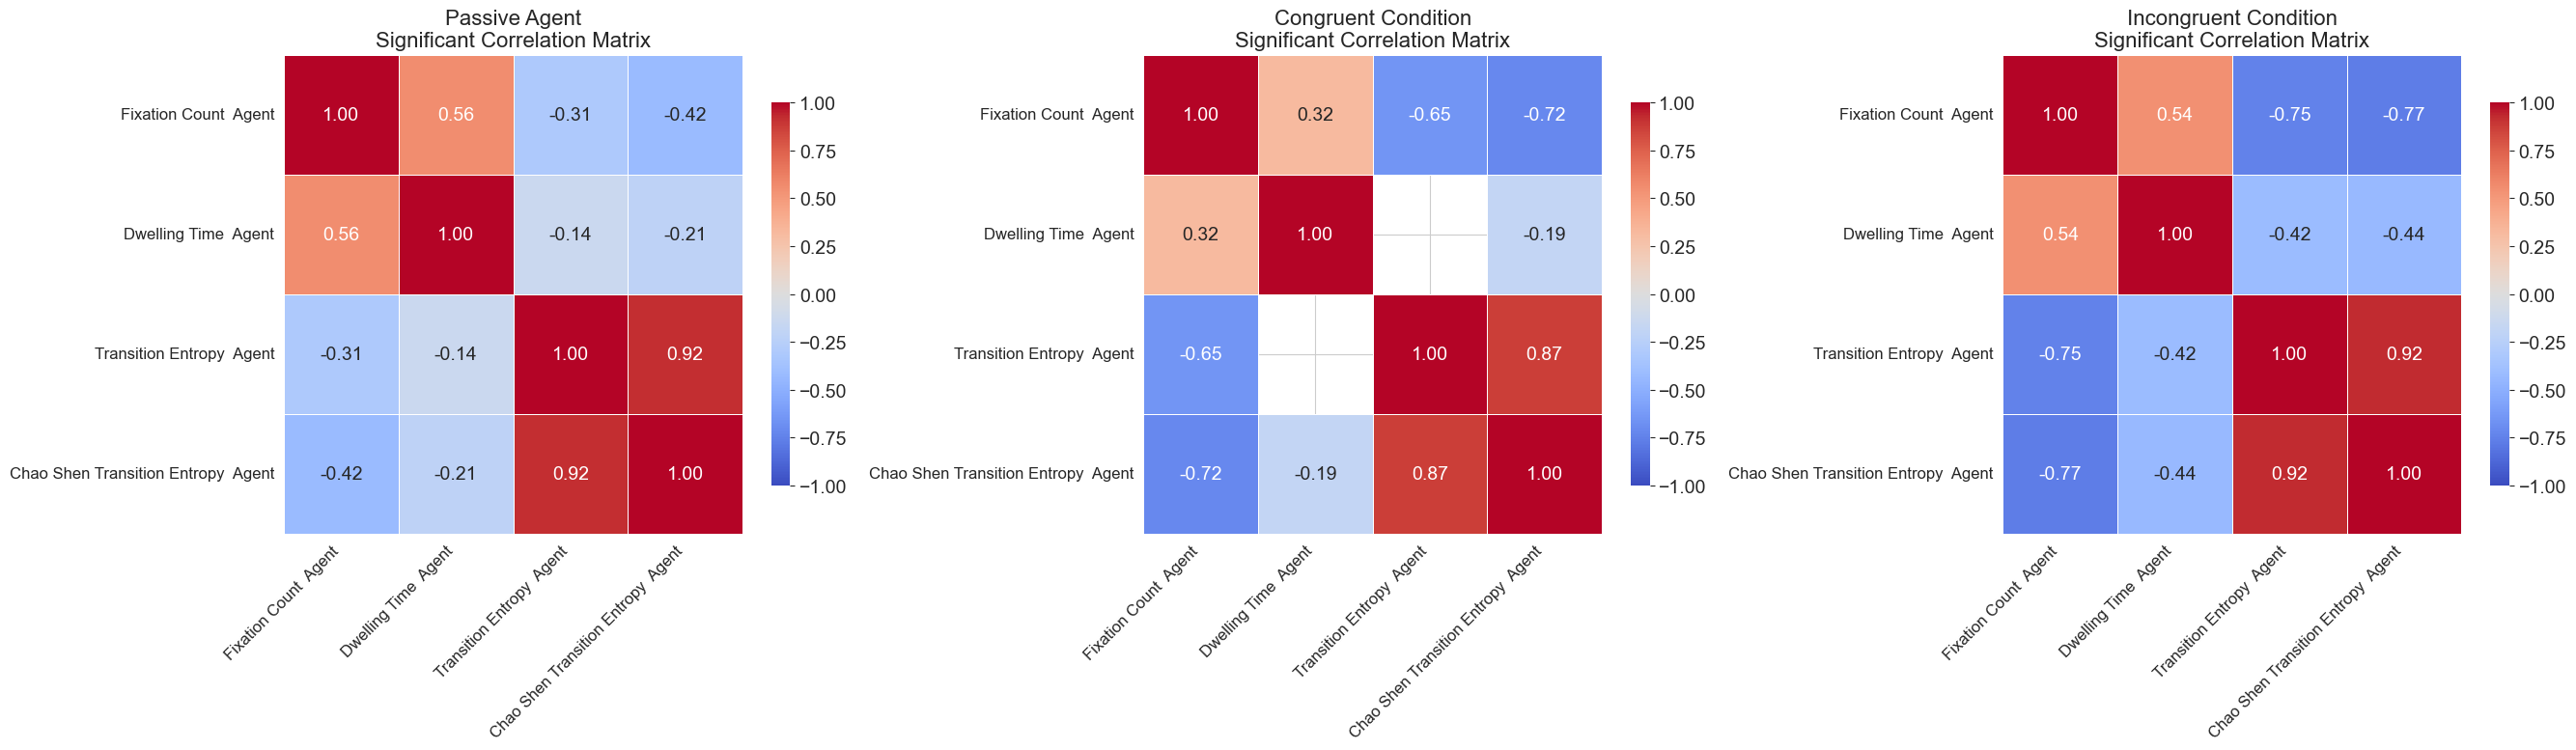

In [25]:

from scipy.stats import pearsonr

# Define the function to format tick labels
def format_ticks(labels):
    """Modify tick labels to remove unnecessary words and format them."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
        # Remove everything after 'Dwelling Time'
        if 'Dwelling Time' in text:
            text = text.split('Dwelling Time')[0] + 'Dwelling Time'
        # Replace 'TaskBuilding_Public' and 'TaskBuilding_Residential'
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        # Remove 'Active' and 'Passive'
        text = text.replace('Active', '').replace('Passive', '').strip()
        # Replace underscores with spaces
        text = text.replace('_', ' ')
        formatted_labels.append(text)
    return formatted_labels

# Reorder rows and columns of the correlation matrices
def reorder_matrix(matrix):
    """Reorder rows and columns in the correlation matrix to start with the second row."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]  # Current second row
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

# Function to calculate significant correlations
def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix

# Calculate the significant correlation matrices
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)
corr_matrix_passive = calculate_significant_correlations(filtered_passive_data)

# Plot the significant correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Large figure for better rendering

# Passive Agent correlation matrix
corr_matrix_passive = reorder_matrix(corr_matrix_passive)
sns.heatmap(
    corr_matrix_passive, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_passive.isnull(), 
    ax=axes[0]
)
axes[0].set_title('Passive Agent\nSignificant Correlation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=12)

# Congruent condition correlation matrix
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent)
sns.heatmap(
    corr_matrix_congruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_congruent.isnull(), 
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nSignificant Correlation Matrix', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=12)

# Incongruent condition correlation matrix
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent)
sns.heatmap(
    corr_matrix_incongruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_incongruent.isnull(), 
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nSignificant Correlation Matrix', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Significant_Entropy_Correlation_Matrices_HighRes.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                        

In [27]:
Long_Agent = combined_data[['ParticipantID', 'SessionNr', 'Experiment', 'Condition', 'Transition_Entropy_Active_Agent', 'Transition_Entropy_Passive_Agent', 'Chao_Shen_Transition_Entropy_Active_Agent', 'Chao_Shen_Transition_Entropy_Passive_Agent']].copy()
Long_Agent.rename({'Transition_Entropy_Active_Agent': 'Active_Agent', 'Transition_Entropy_Passive_Agent': 'Passive_Agent', 'Chao_Shen_Transition_Entropy_Passive_Agent': 'Passive_Agent_Chao', 'Chao_Shen_Transition_Entropy_Active_Agent': 'Active_Agent_Chao'}, axis=1, inplace=True)
id_vars = ['ParticipantID', 'SessionNr', 'Experiment', 'Condition']

# Convert the wide format to long format
long_data = pd.melt(
    Long_Agent, 
    id_vars=id_vars,  # Columns to keep as identifiers
    var_name='Collider_CategoricalN',  # Name of the new column for the variable names
    value_name='Entropy'    # Name of the new column for the values
)

# Display the long-format DataFrame
long_data.head()

ParticipantID SessionNr    Experiment  Condition Collider_CategoricalN  \
0          0479         2  Experiment_1  Congruent          Active_Agent   
1          0479         3  Experiment_1  Congruent          Active_Agent   
2          0479         5  Experiment_1  Congruent          Active_Agent   
3          1754         1  Experiment_1  Congruent          Active_Agent   
4          1754         2  Experiment_1  Congruent          Active_Agent   

    Entropy  
0  0.394916  
1  0.589565  
2  0.712049  
3  0.638567  
4  0.643438

In [28]:
long_data.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent', 'Active_Agent_Chao',
       'Passive_Agent_Chao'], dtype=object)

In [29]:
Long_Agent_Combined = pd.merge(Fixations_Agent, long_data, on=['ParticipantID', 'SessionNr', 'Collider_CategoricalN'], how='inner')

In [30]:
Long_Agent_Combined.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent'], dtype=object)

In [31]:
# Merge the DataFrames on ParticipantID and SessionNr
Complete_Long = pd.merge(
    Long_Agent_Combined,               # Your primary DataFrame
    combined_data[['ParticipantID', 'SessionNr', 'Overall_Transition_Entropy', 'Chao_Shen_Overall_Transition_Entropy']],  # Select only necessary columns
    on=['ParticipantID', 'SessionNr'],  # Keys for merging
    how='left'             # Use 'left' join to keep all rows in df_main
)

# Display the merged DataFrame
Complete_Long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ParticipantID                         546 non-null    object 
 1   SessionNr                             546 non-null    object 
 2   Experiment_x                          546 non-null    int64  
 3   Collider_CategoricalN                 546 non-null    object 
 4   Dwelling_Time                         546 non-null    float64
 5   Fixation_Count                        546 non-null    float64
 6   Experiment_y                          546 non-null    object 
 7   Condition                             546 non-null    object 
 8   Entropy                               546 non-null    float64
 9   Overall_Transition_Entropy            546 non-null    float64
 10  Chao_Shen_Overall_Transition_Entropy  546 non-null    float64
dtypes: float64(5), int6

In [32]:
# Apply the logic to create a new column 'Category'
Complete_Long['Agent_type'] = Complete_Long.apply(
    lambda row: 'Incongruent' if row['Experiment_x'] == 2 and row['Collider_CategoricalN'] == 'Active_Agent'
    else 'Congruent' if row['Experiment_x'] == 1 and row['Collider_CategoricalN'] == 'Active_Agent'
    else 'Passive' if 'Passive' in row['Collider_CategoricalN']
    else 'Unknown', axis=1
)

In [33]:
Complete_Long.head()

ParticipantID SessionNr  Experiment_x Collider_CategoricalN  Dwelling_Time  \
0          1031         1             2          Active_Agent       1.458158   
1          1031         1             2         Passive_Agent       0.679140   
2          1031         2             2          Active_Agent       2.481094   
3          1031         2             2         Passive_Agent       1.255934   
4          1031         3             2          Active_Agent       5.283813   

   Fixation_Count  Experiment_y    Condition   Entropy  \
0        8.333333  Experiment_2  Incongruent  0.613399   
1        3.769231  Experiment_2  Incongruent  0.775604   
2        5.583333  Experiment_2  Incongruent  0.597323   
3        4.500000  Experiment_2  Incongruent  0.694067   
4       22.473684  Experiment_2  Incongruent  0.454144   

   Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.435381                              0.436534   
1                    0.435381                              0.436534   
2                    0.423716                              0.424952   
3                    0.423716                              0.424952   
4                    0.473820                              0.474437   

    Agent_type  
0  Incongruent  
1      Passive  
2  Incongruent  
3      Passive  
4  Incongruent

In [34]:
Fixations_BuildingTask.head()

SubjectID  Experiment             recoded     Collider_CategoricalN  \
42        365           1  BasketballCourt_58       TaskBuilding_Public   
44        365           1     Construction_57       TaskBuilding_Public   
47        365           1      TaskBuilding_1  TaskBuilding_Residential   
48        365           1     TaskBuilding_11       TaskBuilding_Public   
49        365           1     TaskBuilding_12  TaskBuilding_Residential   

    Dwelling_Time  Fixation_Count  
42       2.834136            5.75  
44       0.424187            1.00  
47       8.834621           20.25  
48       7.440282            9.40  
49      13.890718           18.00

In [35]:
Labels_One = pd.read_csv("/Volumes/TwoTeras/Resources/Congruent_Experiment_One.csv")
Labels_Two = pd.read_csv("/Volumes/TwoTeras/Resources/Incongruent_Experiment_Two.csv")
display(Labels_One.head())
Labels_Two.head()


BuildingName  AgentID Agent_type
0        BasketballCourt_58       20  Congruent
1    Church-TaskBuilding_16       28    Passive
2           Construction_57        5  Congruent
3                  Crane_59       27  Congruent
4  HighSilo-TaskBuilding_49       56    Passive

BuildingName  ped_id   Agent_type
0        BasketballCourt_58  10_cma  Incongruent
1    Church-TaskBuilding_16   3_cma  Incongruent
2           Construction_57   36_sa      Passive
3                  Crane_59   7_cma  Incongruent
4  HighSilo-TaskBuilding_49  21_cma  Incongruent

In [36]:
# Create mapping dictionaries from Labels_One and Labels_Two
Labels_One_dict = Labels_One.set_index('BuildingName')['Agent_type'].to_dict()
Labels_Two_dict = Labels_Two.set_index('BuildingName')['Agent_type'].to_dict()

# Function to assign Agent_type
def assign_agent_type(row):
    if row['Experiment'] == 1:
        # Use Labels_One_dict
        return Labels_One_dict.get(row['recoded'], 'Unknown')
    elif row['Experiment'] == 2:
        # Use Labels_Two_dict
        return Labels_Two_dict.get(row['recoded'], 'Unknown')
    else:
        return 'Unknown'
# Apply the function to create the 'Agent_type' column
Fixations_BuildingTask.loc[:, 'Agent_type'] = Fixations_BuildingTask.apply(assign_agent_type, axis=1)



/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/1990758880.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_BuildingTask.loc[:, 'Agent_type'] = Fixations_BuildingTask.apply(assign_agent_type, axis=1)


In [37]:
Fixations_BuildingTask.head()


SubjectID  Experiment             recoded     Collider_CategoricalN  \
42        365           1  BasketballCourt_58       TaskBuilding_Public   
44        365           1     Construction_57       TaskBuilding_Public   
47        365           1      TaskBuilding_1  TaskBuilding_Residential   
48        365           1     TaskBuilding_11       TaskBuilding_Public   
49        365           1     TaskBuilding_12  TaskBuilding_Residential   

    Dwelling_Time  Fixation_Count Agent_type  
42       2.834136            5.75  Congruent  
44       0.424187            1.00  Congruent  
47       8.834621           20.25    Passive  
48       7.440282            9.40  Congruent  
49      13.890718           18.00    Passive

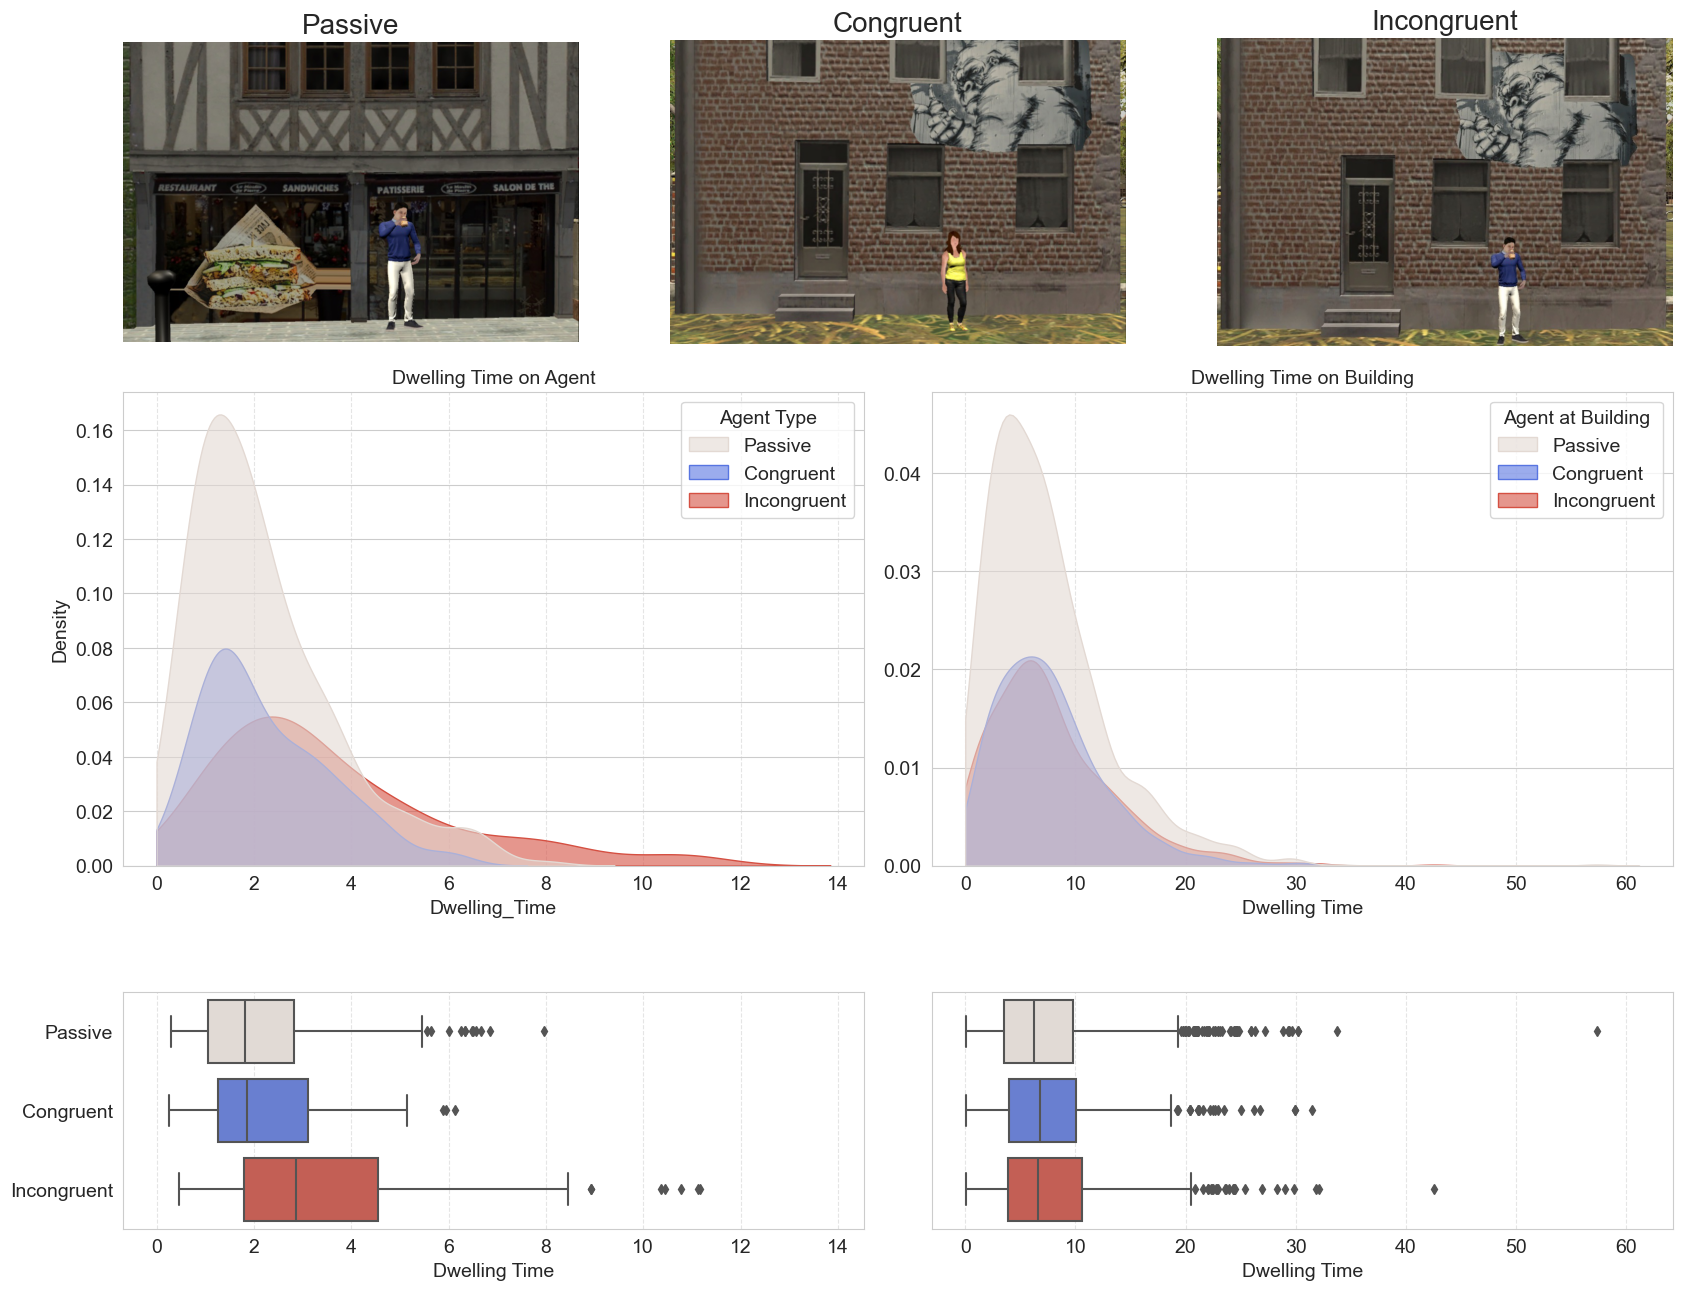

In [38]:


 # Load images
image1 = Image.open("/Volumes/TwoTeras/Resources/06_Congruent.jpg")
image2 = Image.open("/Volumes/TwoTeras/Resources/29_Passive.jpg")
image3 = Image.open("/Volumes/TwoTeras/Resources/06_Incongruent.jpg")

# Resize images (optional) - adjust dimensions
scale_factor = 1  # Increase the size by this factor
image1 = image1.resize((image1.width * scale_factor, image1.height * scale_factor))
image2 = image2.resize((image2.width * scale_factor, image2.height * scale_factor))
image3 = image3.resize((image3.width * scale_factor, image3.height * scale_factor))

# Align all images to the same height
image2 = image2.resize((int(image2.width * image1.height / image2.height), image1.height))
image3 = image3.resize((int(image3.width * image1.height / image3.height), image1.height))

# Extract colors from the 'coolwarm' palette
coolwarm_palette = sns.color_palette("coolwarm", 20)
custom_palette = {
    "Passive": coolwarm_palette[10],    # Gray-like color from coolwarm
    "Congruent": coolwarm_palette[1],  # Blue-like color from coolwarm
    "Incongruent": coolwarm_palette[18] # Red-like color from coolwarm
}

order = ["Passive",  "Congruent", "Incongruent"]

# ----------------------------
# Create separate grids for two figures
# ----------------------------
fig = plt.figure(figsize=(20, 20))  # Increase overall figure size

# First grid: Images
gs_top = fig.add_gridspec(1, 3, height_ratios=[3], top=0.8, bottom=0.6)

ax_img1 = fig.add_subplot(gs_top[0, 0])
ax_img1.imshow(image1)  # Passive
ax_img1.axis("off")
ax_img1.set_title("Passive", fontsize=20)

ax_img2 = fig.add_subplot(gs_top[0, 1])
ax_img2.imshow(image2)  # Congruent
ax_img2.axis("off")
ax_img2.set_title("Congruent", fontsize=20)

ax_img3 = fig.add_subplot(gs_top[0, 2])
ax_img3.imshow(image3)  # Incongruent
ax_img3.axis("off")
ax_img3.set_title("Incongruent", fontsize=20)

# Add black space below the first grid
plt.subplots_adjust(hspace=0.4)

# Second grid: KDE and Box Plots
gs_bottom = fig.add_gridspec(3, 4, height_ratios=[1.5, 0.75, 0.75], top=0.6, bottom=0)

# Second row: KDE plots
ax_kde_agents = fig.add_subplot(gs_bottom[0, 0:2])
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_agents,
    clip=(0, None),
    fill=True,
    alpha=0.6,
    palette=custom_palette,  # Use custom palette
    hue_order=order  # Explicitly set order
)
ax_kde_agents.set_title("Dwelling Time on Agent", fontsize=14)
ax_kde_agents.set_ylabel("Density")
ax_kde_agents.grid(axis='x', linestyle='--', alpha=0.5)

# Change legend title
legend = ax_kde_agents.legend_  # Access the legend created by kdeplot
if legend:  # If a legend exists
    legend.set_title("Agent Type")

ax_kde_buildings = fig.add_subplot(gs_bottom[0, 2:4])
sns.kdeplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_buildings,
    clip=(0, None),
    fill=True,
    alpha=0.6,
    palette=custom_palette,  # Use custom palette
    hue_order=order  # Explicitly set order
)
ax_kde_buildings.set_title("Dwelling Time on Building", fontsize=14)
ax_kde_buildings.set_ylabel("")
ax_kde_buildings.set_xlabel("Dwelling Time")
ax_kde_buildings.grid(axis='x', linestyle='--', alpha=0.5)

# Change legend title
legend = ax_kde_buildings.legend_  # Access the legend created by kdeplot
if legend:  # If a legend exists
    legend.set_title("Agent at Building")

# Third row: Box plots
ax_box_agents = fig.add_subplot(gs_bottom[1, 0:2], sharex=ax_kde_agents)
sns.boxplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_agents,
    orient="h",
    palette=custom_palette,  # Use custom palette
    order=order  # Specify order explicitly
)
ax_box_agents.set_xlabel("Dwelling Time")
ax_box_agents.grid(axis='x', linestyle='--', alpha=0.5)
ax_box_agents.set_ylabel(None)  # Remove Y-axis label

ax_box_buildings = fig.add_subplot(gs_bottom[1, 2:4], sharex=ax_kde_buildings)
sns.boxplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_buildings,
    orient="h",
    palette=custom_palette,  # Use custom palette
    order=order  # Specify order explicitly
)
ax_box_buildings.set_xlabel("Dwelling Time")
ax_box_buildings.tick_params(labelleft=False, left=False)  # Remove Y-axis labels
ax_box_buildings.set_ylabel(None)
ax_box_buildings.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout for cleaner spacing
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Methods_Entropy.png", dpi=900, bbox_inches="tight")
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/2317329535.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


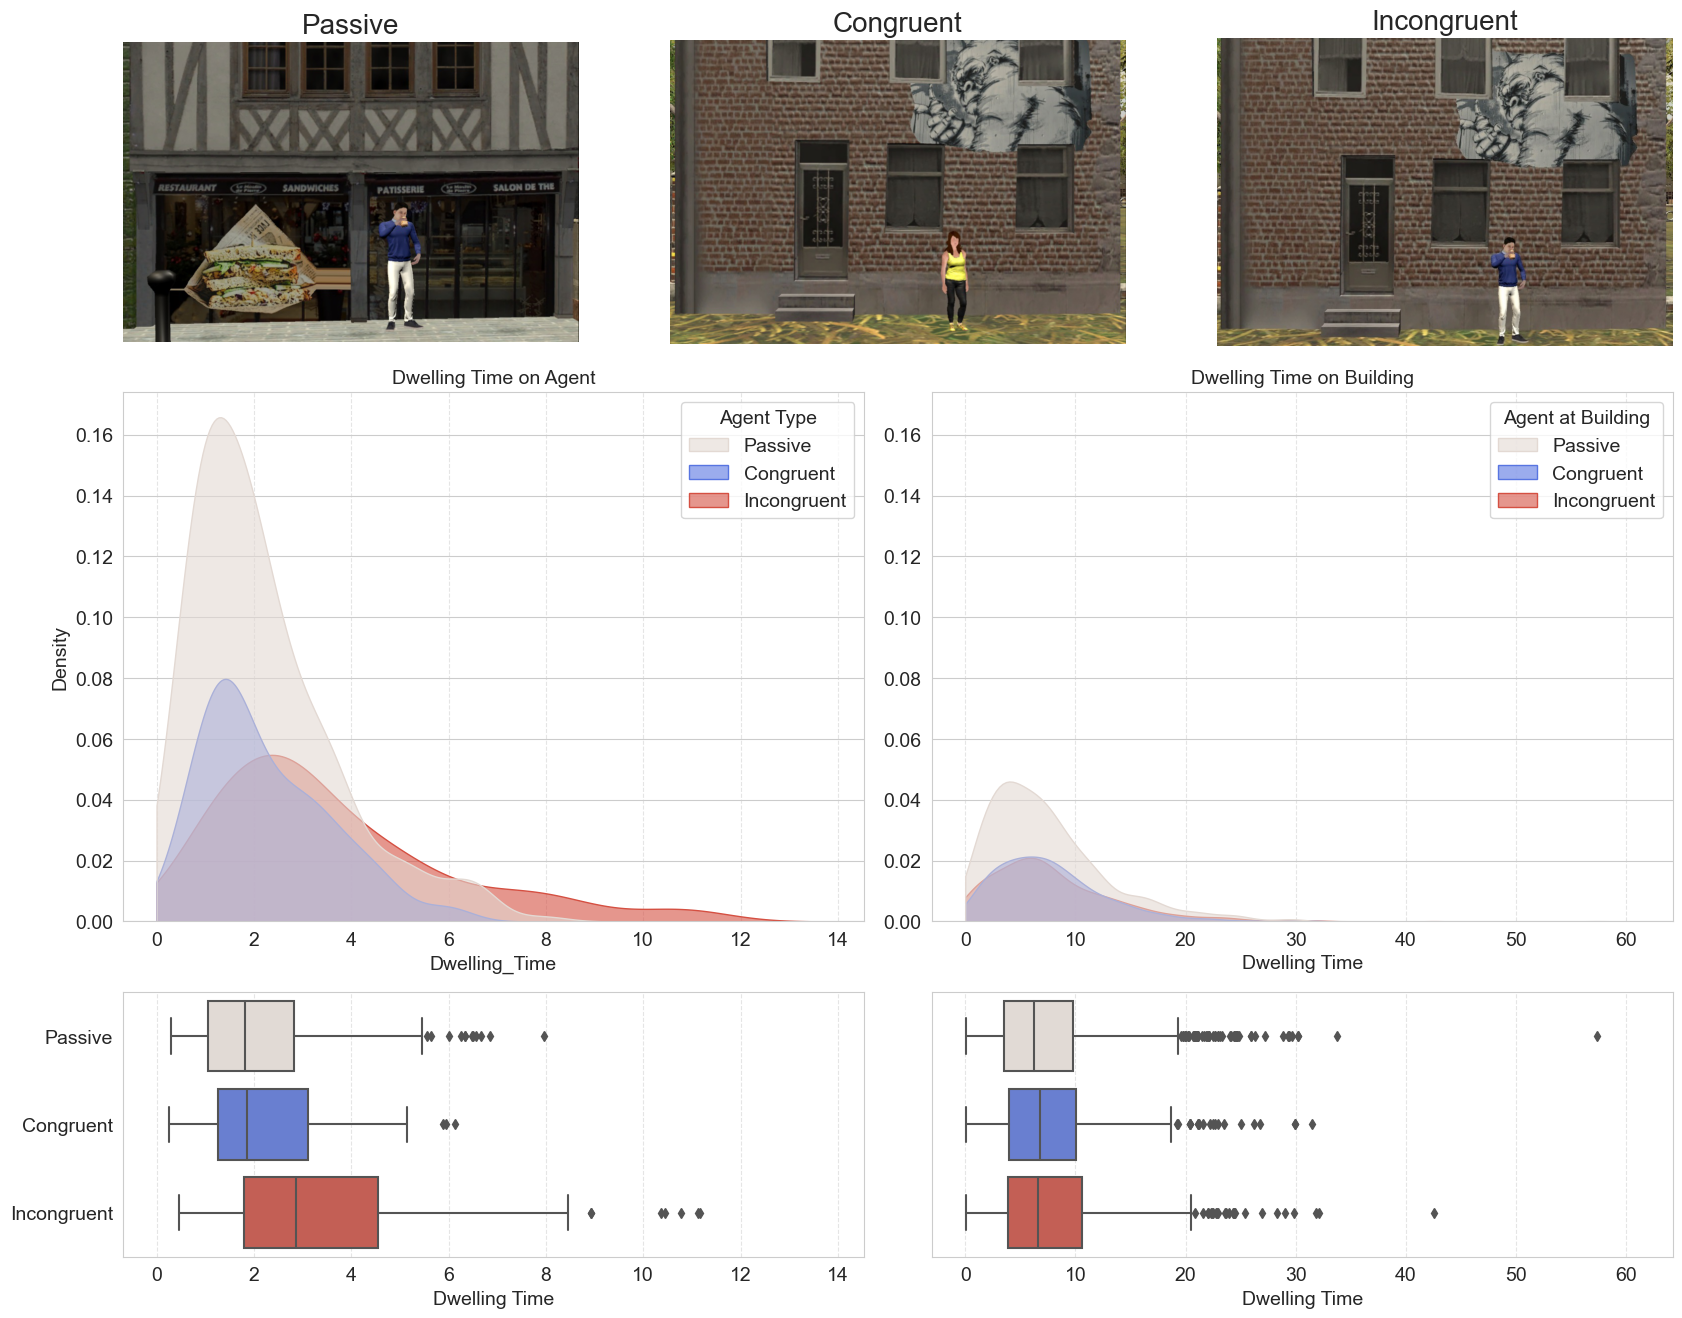

In [39]:
from matplotlib import gridspec
from matplotlib import pyplot as plt

# ----------------------------
# Create separate grids for two figures
# ----------------------------
fig = plt.figure(figsize=(20, 20))  # Increase overall figure size

# First grid: Images
gs_top = fig.add_gridspec(1, 3, height_ratios=[3], top=0.8, bottom=0.6)

ax_img1 = fig.add_subplot(gs_top[0, 0])
ax_img1.imshow(image1)  # Passive
ax_img1.axis("off")
ax_img1.set_title("Passive", fontsize=20)

ax_img2 = fig.add_subplot(gs_top[0, 1])
ax_img2.imshow(image2)  # Congruent
ax_img2.axis("off")
ax_img2.set_title("Congruent", fontsize=20)

ax_img3 = fig.add_subplot(gs_top[0, 2])
ax_img3.imshow(image3)  # Incongruent
ax_img3.axis("off")
ax_img3.set_title("Incongruent", fontsize=20)

# Second grid: KDE and Box Plots
gs_bottom = fig.add_gridspec(3, 4, height_ratios=[1.5, 0.75, 0.75], top=0.6, bottom=0)

# Second row: KDE plots with shared y-axis
ax_kde_agents = fig.add_subplot(gs_bottom[0, 0:2])
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_agents,
    clip=(0, None),
    fill=True,
    alpha=0.6,
    palette=custom_palette,  # Use custom palette
    hue_order=order  # Explicitly set order
)
ax_kde_agents.set_title("Dwelling Time on Agent", fontsize=14)
ax_kde_agents.set_ylabel("Density")
ax_kde_agents.grid(axis='x', linestyle='--', alpha=0.5)

# Change legend title
legend = ax_kde_agents.legend_  # Access the legend created by kdeplot
if legend:
    legend.set_title("Agent Type")

ax_kde_buildings = fig.add_subplot(gs_bottom[0, 2:4], sharey=ax_kde_agents)  # Share Y-axis
sns.kdeplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_buildings,
    clip=(0, None),
    fill=True,
    alpha=0.6,
    palette=custom_palette,  # Use custom palette
    hue_order=order  # Explicitly set order
)
ax_kde_buildings.set_title("Dwelling Time on Building", fontsize=14)
ax_kde_buildings.set_ylabel("")
ax_kde_buildings.set_xlabel("Dwelling Time")
ax_kde_buildings.grid(axis='x', linestyle='--', alpha=0.5)

# Change legend title
legend = ax_kde_buildings.legend_
if legend:
    legend.set_title("Agent at Building")

# Third row: Box plots with shared x-axis
ax_box_agents = fig.add_subplot(gs_bottom[1, 0:2], sharex=ax_kde_agents)
sns.boxplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_agents,
    orient="h",
    palette=custom_palette,  # Use custom palette
    order=order  # Specify order explicitly
)
ax_box_agents.set_xlabel("Dwelling Time")
ax_box_agents.grid(axis='x', linestyle='--', alpha=0.5)
ax_box_agents.set_ylabel(None)

ax_box_buildings = fig.add_subplot(gs_bottom[1, 2:4], sharex=ax_kde_buildings)
sns.boxplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_buildings,
    orient="h",
    palette=custom_palette,  # Use custom palette
    order=order  # Specify order explicitly
)
ax_box_buildings.set_xlabel("Dwelling Time")
ax_box_buildings.tick_params(labelleft=False, left=False)
ax_box_buildings.set_ylabel(None)
ax_box_buildings.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout for cleaner spacing
plt.tight_layout()

# Save the plot
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Methods_Entropy.png", dpi=900, bbox_inches="tight")
plt.show()


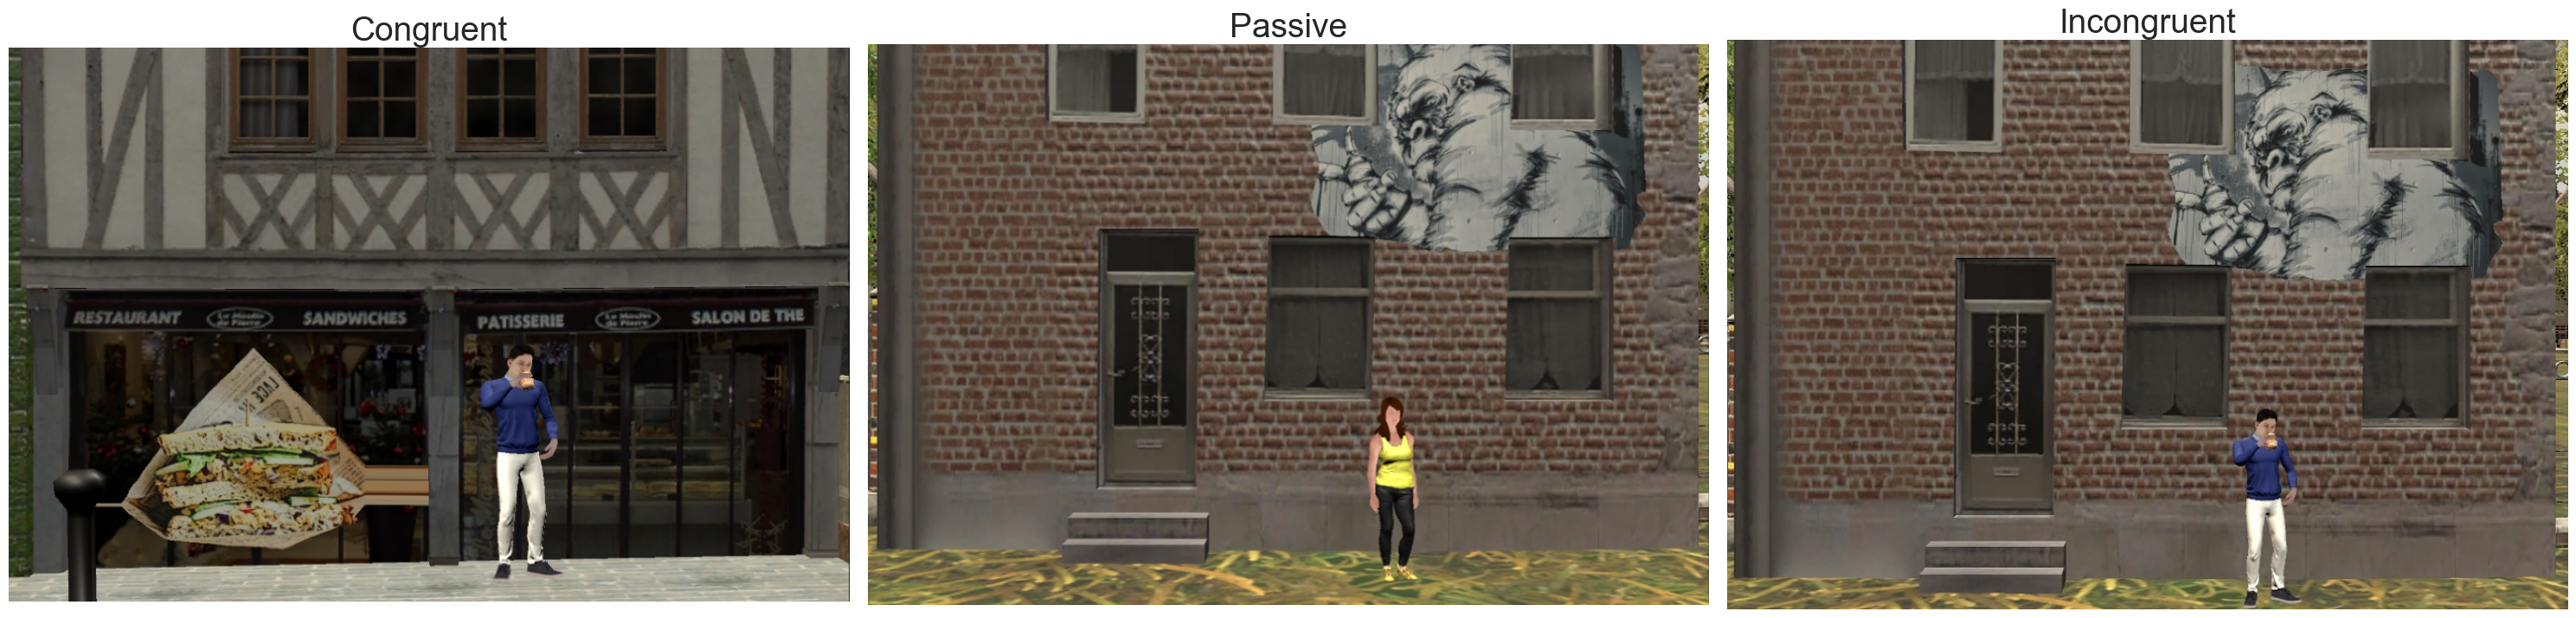

In [40]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(30, 15))  # 1 row, 3 columns

# Display each image with titles
axes[0].imshow(image1)
axes[0].axis("off")
axes[0].set_title("Congruent", fontsize=28)

axes[1].imshow(image2)
axes[1].axis("off")
axes[1].set_title("Passive", fontsize=28)

axes[2].imshow(image3)
axes[2].axis("off")
axes[2].set_title("Incongruent", fontsize=28)

# Adjust layout and show the final figure
plt.tight_layout()
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/1571834292.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


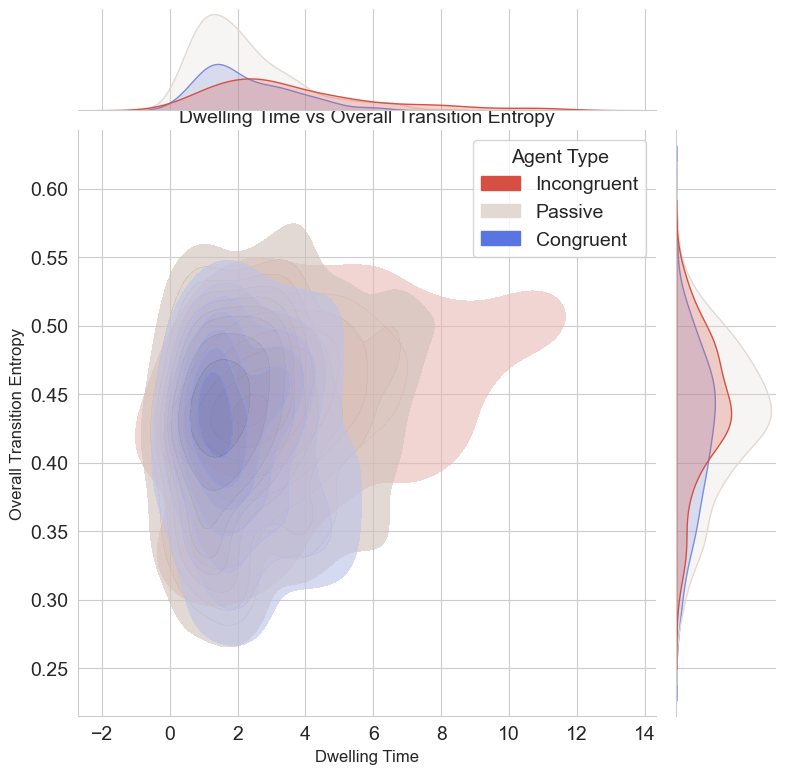

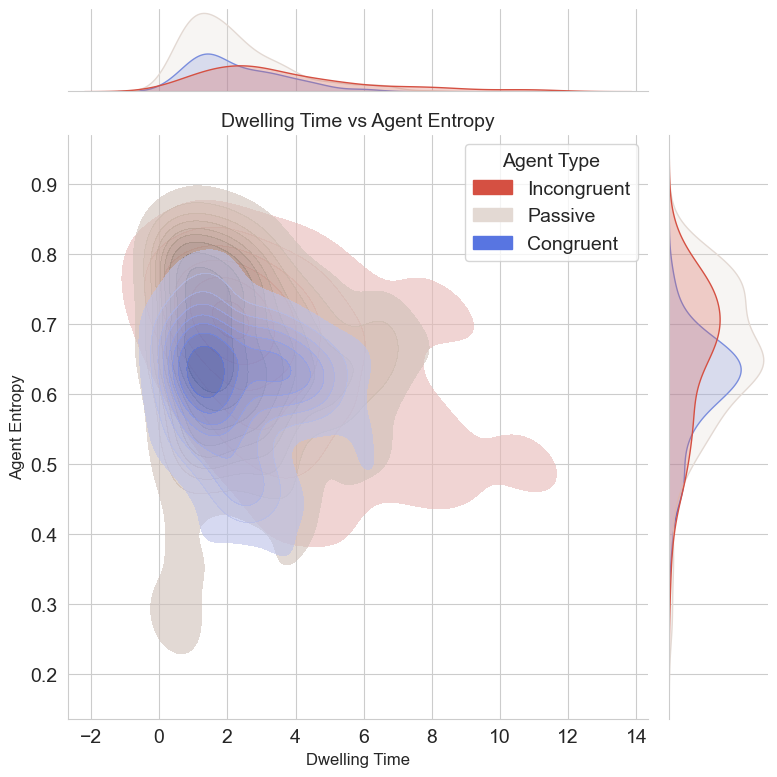

In [41]:

# Jointplot 1: Dwelling Time vs Overall Transition Entropy
plot1 = sns.jointplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    kind="kde",
    height=8,
    fill=True,  # Fill the KDE areas
    alpha=0.6,  # Transparency for filled areas
    palette=custom_palette  # Use a visually appealing palette
)
plot1.ax_joint.set_title("Dwelling Time vs Overall Transition Entropy", fontsize=14)
plot1.ax_joint.set_xlabel("Dwelling Time", fontsize=12)
plot1.ax_joint.set_ylabel("Overall Transition Entropy", fontsize=12)
plot1.ax_joint.legend_.set_title("Agent Type")  # Add a legend title

# Jointplot 2: Dwelling Time vs Agent Entropy
plot2 = sns.jointplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    kind="kde",
    height=8,
    fill=True,  # Fill the KDE areas
    alpha=0.6,  # Transparency for filled areas
    palette=custom_palette  # Consistent palette
)
plot2.ax_joint.set_title("Dwelling Time vs Agent Entropy", fontsize=14)
plot2.ax_joint.set_xlabel("Dwelling Time", fontsize=12)
plot2.ax_joint.set_ylabel("Agent Entropy", fontsize=12)
plot2.ax_joint.legend_.set_title("Agent Type")  # Add a legend title

# Adjust layout and save the plots
plt.tight_layout()

# Save each plot separately or combine them
plot1.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Jointplot_Dwelling_vs_Overall_Entropy.png", dpi=300, bbox_inches="tight")
plot2.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Jointplot_Dwelling_vs_Agent_Entropy.png", dpi=300, bbox_inches="tight")

plt.show()


In [42]:
Complete_Long.head()

ParticipantID SessionNr  Experiment_x Collider_CategoricalN  Dwelling_Time  \
0          1031         1             2          Active_Agent       1.458158   
1          1031         1             2         Passive_Agent       0.679140   
2          1031         2             2          Active_Agent       2.481094   
3          1031         2             2         Passive_Agent       1.255934   
4          1031         3             2          Active_Agent       5.283813   

   Fixation_Count  Experiment_y    Condition   Entropy  \
0        8.333333  Experiment_2  Incongruent  0.613399   
1        3.769231  Experiment_2  Incongruent  0.775604   
2        5.583333  Experiment_2  Incongruent  0.597323   
3        4.500000  Experiment_2  Incongruent  0.694067   
4       22.473684  Experiment_2  Incongruent  0.454144   

   Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.435381                              0.436534   
1                    0.435381                              0.436534   
2                    0.423716                              0.424952   
3                    0.423716                              0.424952   
4                    0.473820                              0.474437   

    Agent_type  
0  Incongruent  
1      Passive  
2  Incongruent  
3      Passive  
4  Incongruent

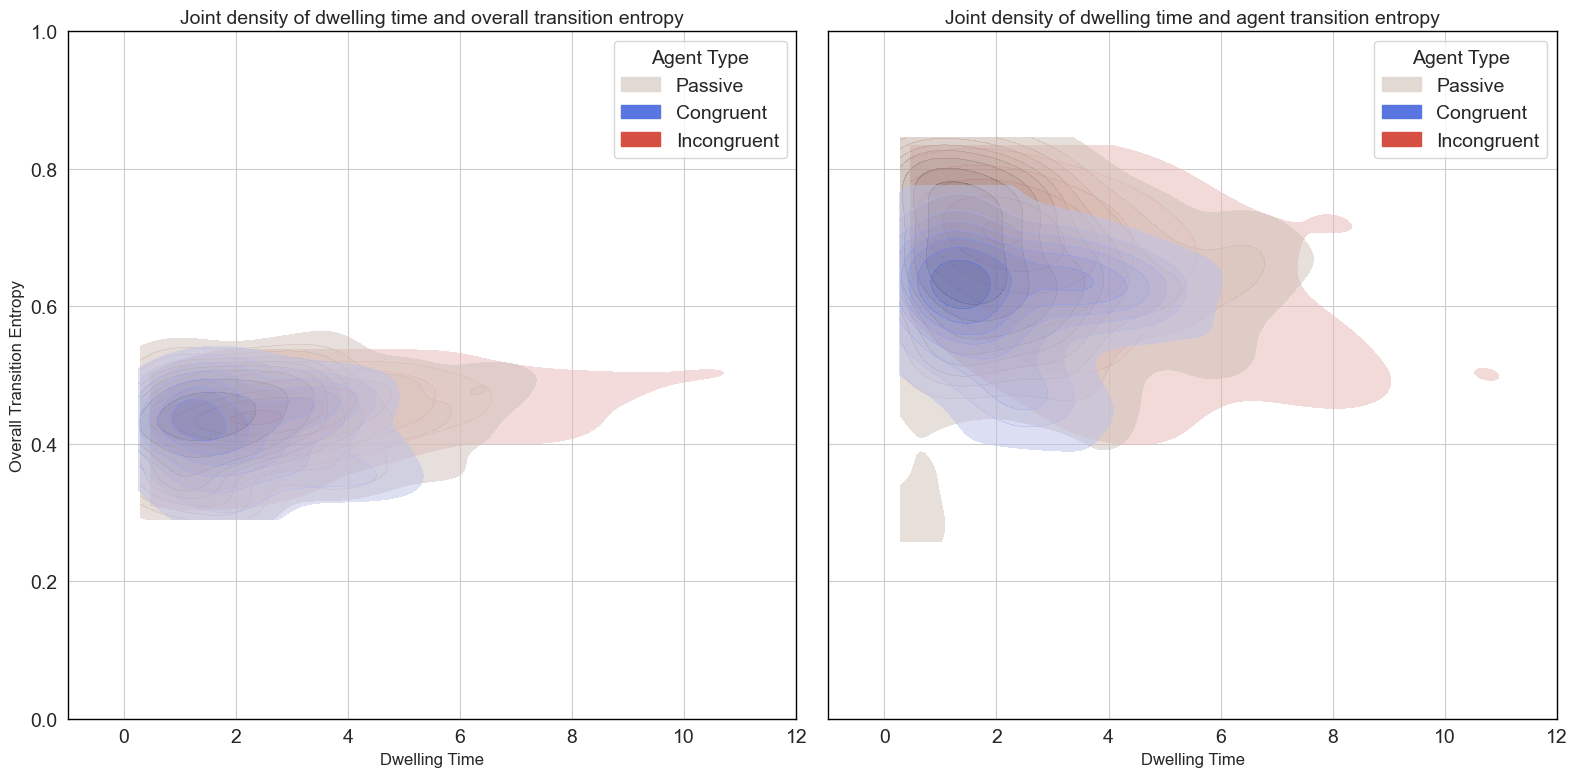

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set_style("whitegrid")

# Create a single figure with two side-by-side plots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Add `sharey=True`

# Set the figure background to white
#fig.patch.set_facecolor('white')

# Define the desired order for the legend
desired_order = ["Passive", "Congruent", "Incongruent"]

# Jointplot 1: Dwelling Time vs Overall Transition Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette=custom_palette,
    cut=0,  # Prevent the KDE from extending beyond the data's range
    ax=axes[0]
)
axes[0].set_title("Joint density of dwelling time and overall transition entropy", fontsize=14)
axes[0].set_xlabel("Dwelling Time", fontsize=12)
axes[0].set_ylabel("Overall Transition Entropy", fontsize=12)
axes[0].set_xlim(-1, 12)  # Set x-axis limits
axes[0].set_ylim(0, 1)    # Set y-axis limits
#axes[0].set_facecolor('white')  # Set the axes background to white

# Add a border (spines)
for spine in axes[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color("black")
    

# Manually create legend for axes[0] with desired order
legend_handles = [
    mpatches.Patch(color=custom_palette[agent], label=agent) for agent in desired_order
]
axes[0].legend(handles=legend_handles, title="Agent Type")

# Jointplot 2: Dwelling Time vs Agent Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette=custom_palette,
    cut=0,  # Prevent the KDE from extending beyond the data's range
    ax=axes[1]
)
axes[1].set_title("Joint density of dwelling time and agent transition entropy", fontsize=14)
axes[1].set_xlabel("Dwelling Time", fontsize=12)
axes[1].set_ylabel("")  # Remove redundant y-axis label
axes[1].set_xlim(-1, 12)  # Set x-axis limits
axes[1].set_ylim(0, 1)    # Set y-axis limits
#axes[1].set_facecolor('white')  # Set the axes background to white

# Add a border (spines)
for spine in axes[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color("black")

# Add white gridlines
#axes[1].grid(color='white', linewidth=0.7, linestyle='--')

# Manually create legend for axes[1] with desired order
legend_handles = [
    mpatches.Patch(color=custom_palette[agent], label=agent) for agent in desired_order
]
axes[1].legend(handles=legend_handles, title="Agent Type")

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Combined_Jointplots_White_Grid.png", dpi=300, bbox_inches="tight", facecolor='white')

# Show the plot
plt.show()


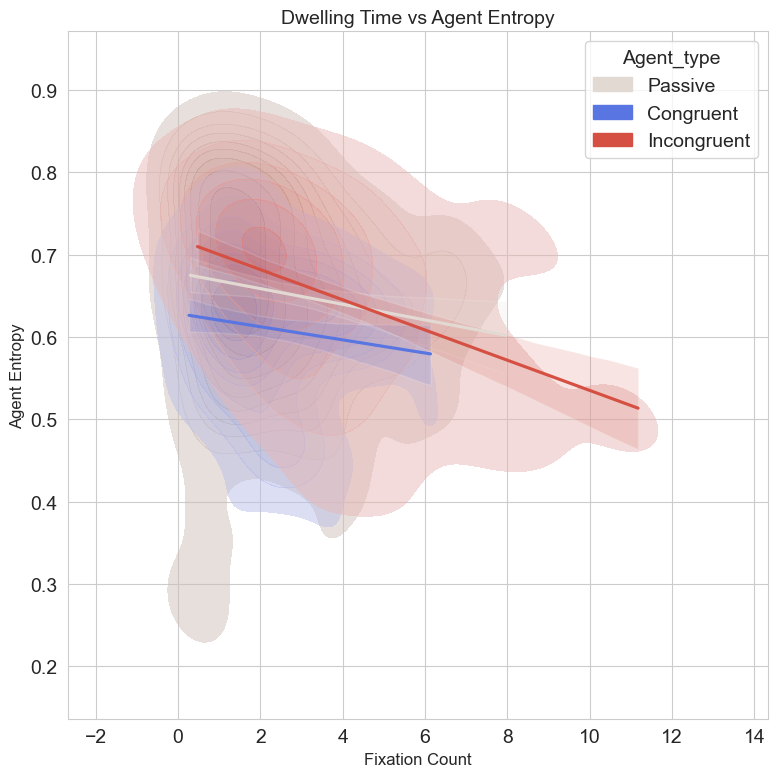

In [44]:
# Ensure the Agent_type column is categorical with the desired order
Complete_Long['Agent_type'] = pd.Categorical(
    Complete_Long['Agent_type'], 
    categories=["Passive", "Congruent", "Incongruent"],
    ordered=True
)

# Create a single figure for one plot
fig, ax = plt.subplots(figsize=(8, 8))  # Create a single axis

# Define unique groups in the desired order
unique_agents = ["Passive", "Congruent", "Incongruent"]

# Use the custom_palette dictionary directly for color mapping
color_mapping = {agent: custom_palette[agent] for agent in unique_agents}

# Plot: Fixation Count vs Agent Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette=custom_palette,  # Pass the dictionary directly
    hue_order=unique_agents,  # Ensure the hue order matches desired sequence
    ax=ax  # Use the single axis
)
for agent in unique_agents:
    sns.regplot(
        data=Complete_Long[Complete_Long['Agent_type'] == agent],
        x="Dwelling_Time",
        y="Entropy",
        scatter=False,  # Do not show scatter points for regression
        color=color_mapping[agent],  # Use group-specific color
        ax=ax  # Use the single axis
    )
ax.set_title("Dwelling Time vs Agent Entropy", fontsize=14)
ax.set_xlabel("Fixation Count", fontsize=12)
ax.set_ylabel("Agent Entropy", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/FixationCount_vs_AgentEntropy_Ordered.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4270/3705765181.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


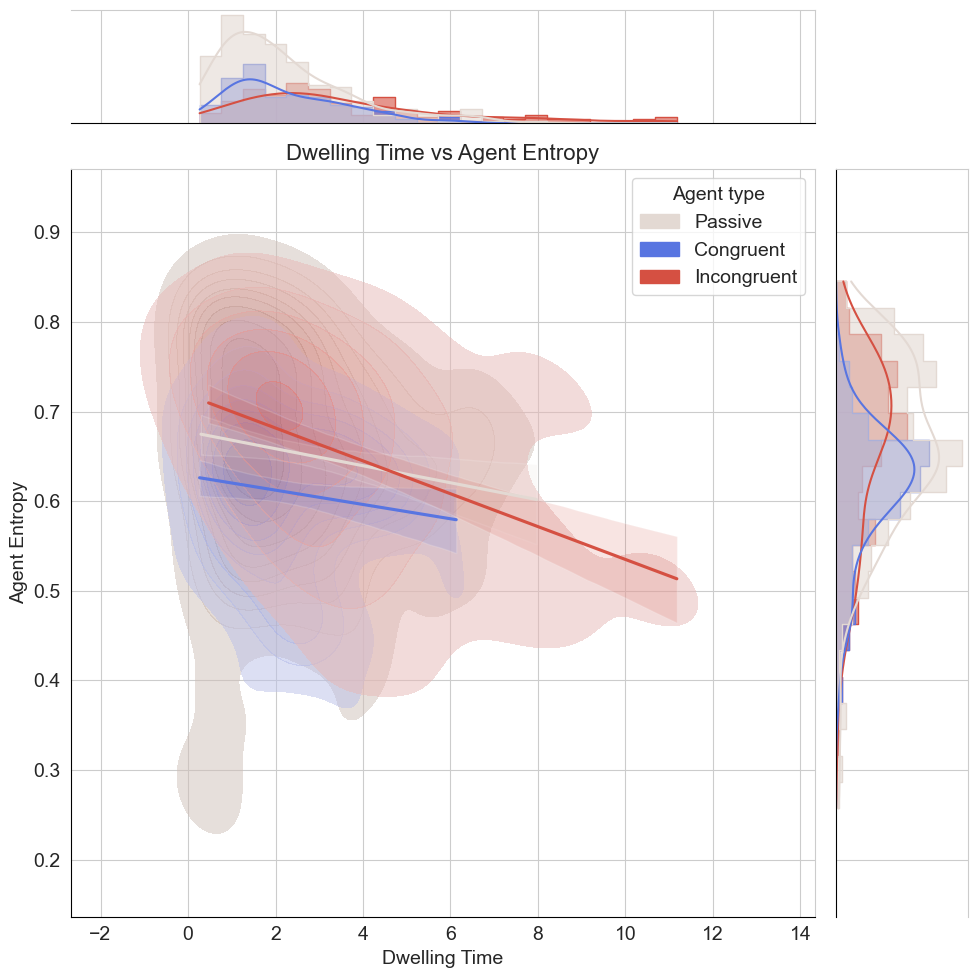

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set black and white background
sns.set_style("whitegrid")  # Choose "white" or "whitegrid" based on preference

# Ensure the Agent_type column is categorical with the desired order
Complete_Long['Agent_type'] = pd.Categorical(
    Complete_Long['Agent_type'], 
    categories=["Passive", "Congruent", "Incongruent"],
    ordered=True
)

# Define unique groups in the desired order
unique_agents = ["Passive", "Congruent", "Incongruent"]

# Use the custom_palette dictionary directly for color mapping
color_mapping = {agent: custom_palette[agent] for agent in unique_agents}

# Create a JointGrid for combined KDE and marginal distributions with a larger figure size
g = sns.JointGrid(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    palette=custom_palette,
    hue_order=unique_agents,
    height=10  # Increase the height of the plot (default is 6)
)

# Central plot: KDE with regression lines
g.plot_joint(
    sns.kdeplot,
    fill=True,
    alpha=0.5
)
for agent in unique_agents:
    sns.regplot(
        data=Complete_Long[Complete_Long['Agent_type'] == agent],
        x="Dwelling_Time",
        y="Entropy",
        scatter=False,  # Do not show scatter points for regression
        color=color_mapping[agent],
        ax=g.ax_joint  # Add regression line to central plot
    )

# Marginal plots: Distribution of x and y
g.plot_marginals(
    sns.histplot,
    kde=True,  # Add KDE on top of histogram
    element="step",
    alpha=0.6
)

# Customize background
g.ax_joint.set_facecolor("white")  # White background for the joint plot
g.ax_marg_x.set_facecolor("white")  # White background for top marginal
g.ax_marg_y.set_facecolor("white")  # White background for side marginal

# Add labels and title
g.ax_joint.set_title("Dwelling Time vs Agent Entropy", fontsize=16)
g.ax_joint.set_xlabel("Dwelling Time", fontsize=14)
g.ax_joint.set_ylabel("Agent Entropy", fontsize=14)

# Customize edges and spines for black and white contrast
for ax in [g.ax_joint, g.ax_marg_x, g.ax_marg_y]:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
# Customize the legend title to replace underscores with spaces
legend = g.ax_joint.legend_
if legend:  # Check if the legend exists
    legend.set_title(legend.get_title().get_text().replace('_', ' '))


# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/FixationCount_vs_AgentEntropy_BW.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


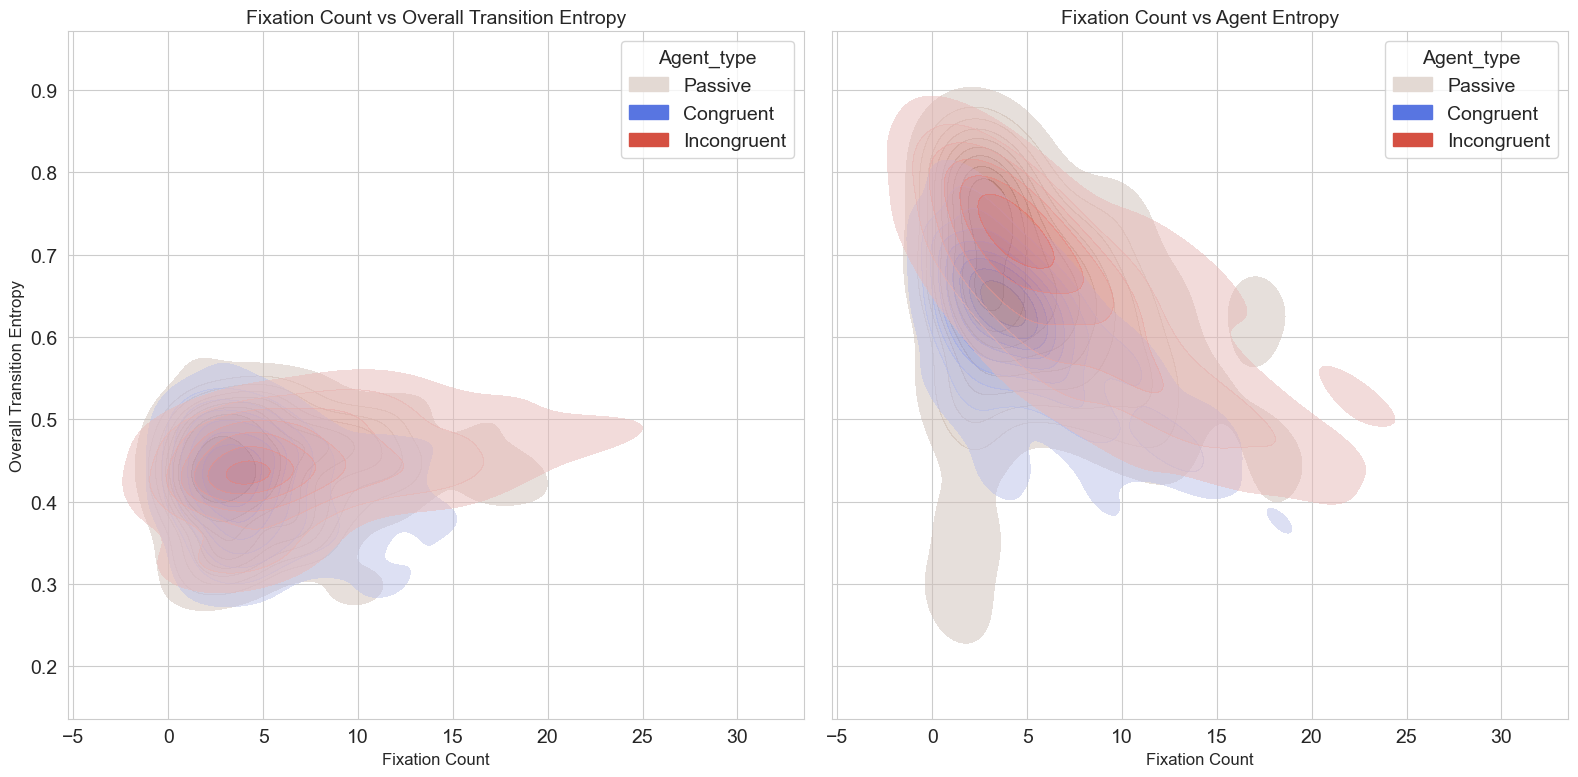

In [46]:
# Create a single figure with two side-by-side plots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Add `sharey=True`

# Jointplot 1: Fixation Count vs Overall Transition Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Fixation_Count",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette=custom_palette,
    ax=axes[0]
)
axes[0].set_title("Fixation Count vs Overall Transition Entropy", fontsize=14)
axes[0].set_xlabel("Fixation Count", fontsize=12)
axes[0].set_ylabel("Overall Transition Entropy", fontsize=12)

# Jointplot 2: Fixation Count vs Agent Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Fixation_Count",
    y="Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette=custom_palette,
    ax=axes[1]
)
axes[1].set_title("Fixation Count vs Agent Entropy", fontsize=14)
axes[1].set_xlabel("Fixation Count", fontsize=12)
# Remove redundant y-axis label
axes[1].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Combined_FixationCount_Jointplots_SharedY.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [47]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

ParticipantID  SessionNr  Exploration_General  Exploration_Agent
0          0365          1                0.600               0.58
1          0365          2                0.575               0.48
2          0365          3                0.410               0.27
3          0365          4                0.440               0.34
4          0365          5                0.460               0.37

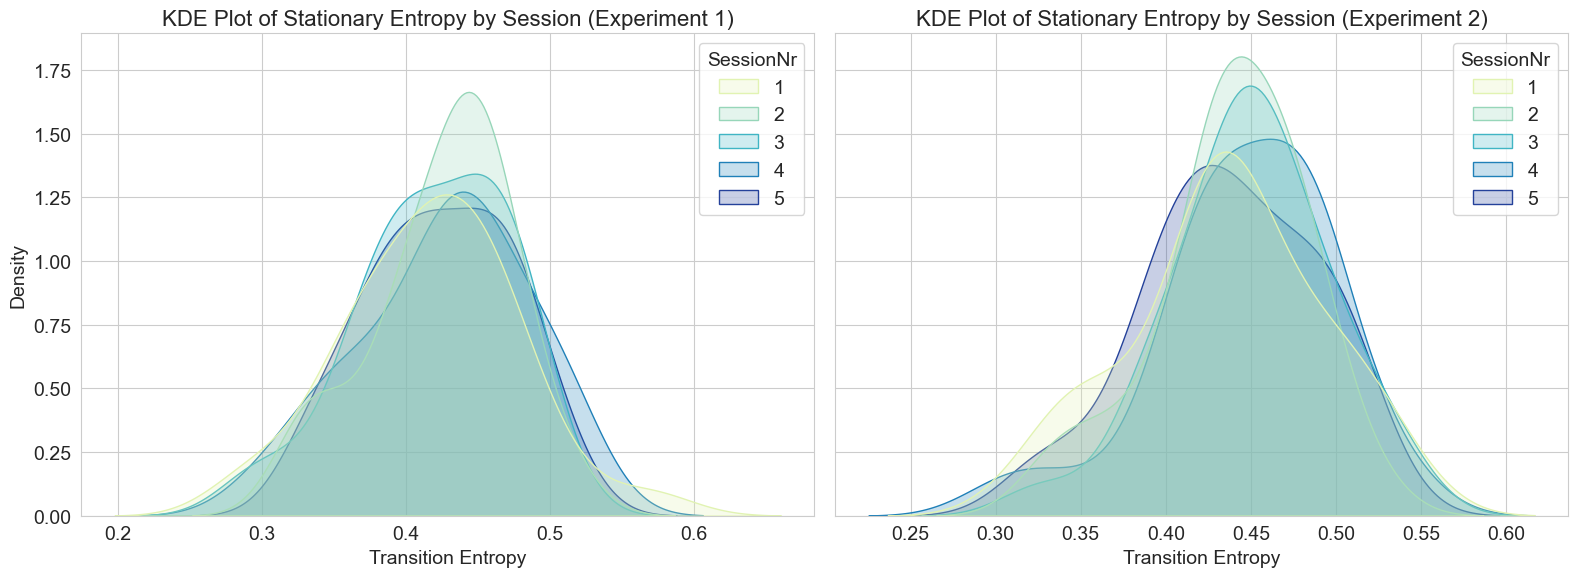

In [48]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [49]:
# Merging the dataframes on 'SubjectID' and 'SessionNr'
merged_df = pd.merge(stacked_df, Coverage, on=['ParticipantID', 'SessionNr'])
Exploration_Entropy = pd.merge(merged_df, Exploration_Complete, on=['ParticipantID', 'SessionNr']) 
Exploration_Entropy.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.418186                              0.418806   
1                    0.437667                              0.438649   
2                    0.476741                              0.477635   
3                    0.457486                              0.458469   
4                    0.418219                              0.418662   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.409746                     0.421414   
1                       0.444608                     0.450309   
2                       0.456125                     0.462481   
3                       0.409551                     0.491682   
4                       0.354675                     0.488330   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.408450   
1                                0.407788   
2                                0.597910   
3                                0.548347   
4                                0.625878   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.450897   
1                                     0.429398   
2                                     0.537614   
3                                     0.584020   
4                                     0.584097   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.375698                          0.394601   
1                            0.325598                          0.459708   
2                            0.518205                          0.513632   
3                            0.609962                          0.653258   
4                            0.725812                          0.636384   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.638567                                 0.409753   
1                         0.643438                                 0.444626   
2                         0.585467                                 0.456369   
3                         0.619141                                 0.409558   
4                         0.641415                                 0.354705   

   ...  Stationary_Entropy_Active_Agent  ParticipantID  SessionNr  \
0  ...                         0.027955           1754          1   
1  ...                         0.013087           1754          2   
2  ...                         0.011026           1754          3   
3  ...                         0.012002           1754          4   
4  ...                         0.013794           1754          5   

   IndividualNodeCount  Experiment  CummulativeNodeCount  IndividualRatio  \
0                   85        Exp1                    85         0.537975   
1                   95        Exp1                   119         0.601266   
2                   90        Exp1                   130         0.569620   
3                  108        Exp1                   138         0.683544   
4                  109        Exp1                   138         0.689873   

   CummulativeRatio  Exploration_General  Exploration_Agent  
0          0.537975               0.7800               0.78  
1          0.753165               0.6025               0.55  
2          0.822785               0.5500               0.41  
3          0.873418               0.5425               0.47  
4          0.873418               0.4375               0.32  

[5 rows x 32 columns]

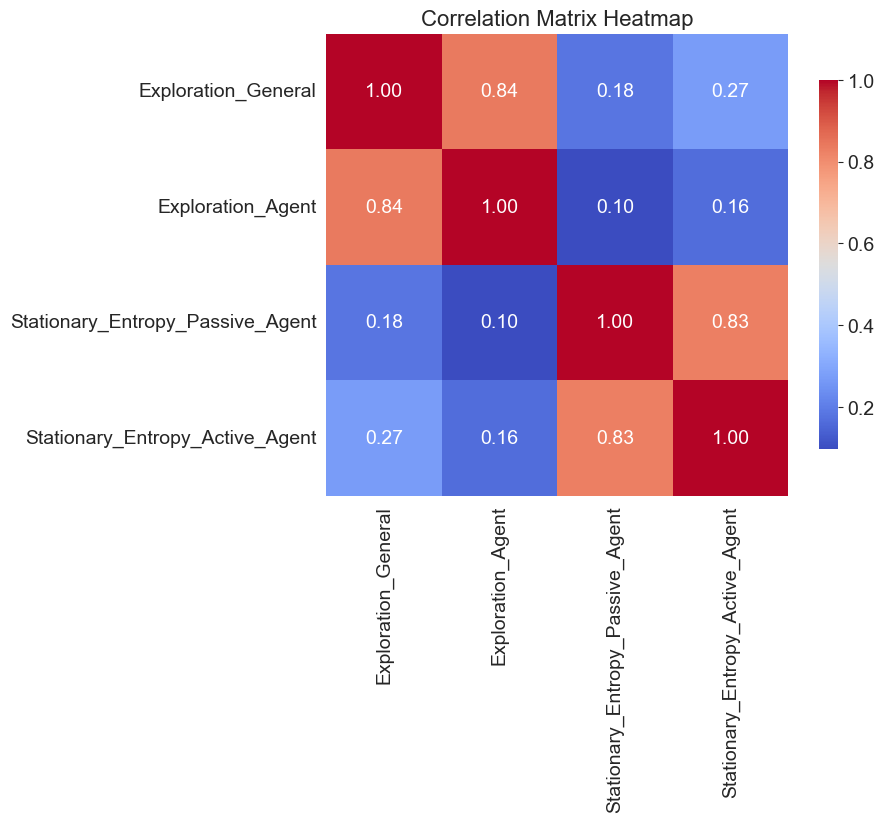

In [50]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: xlabel='Transition_Entropy_Active_Agent', ylabel='Exploration_Agent'>

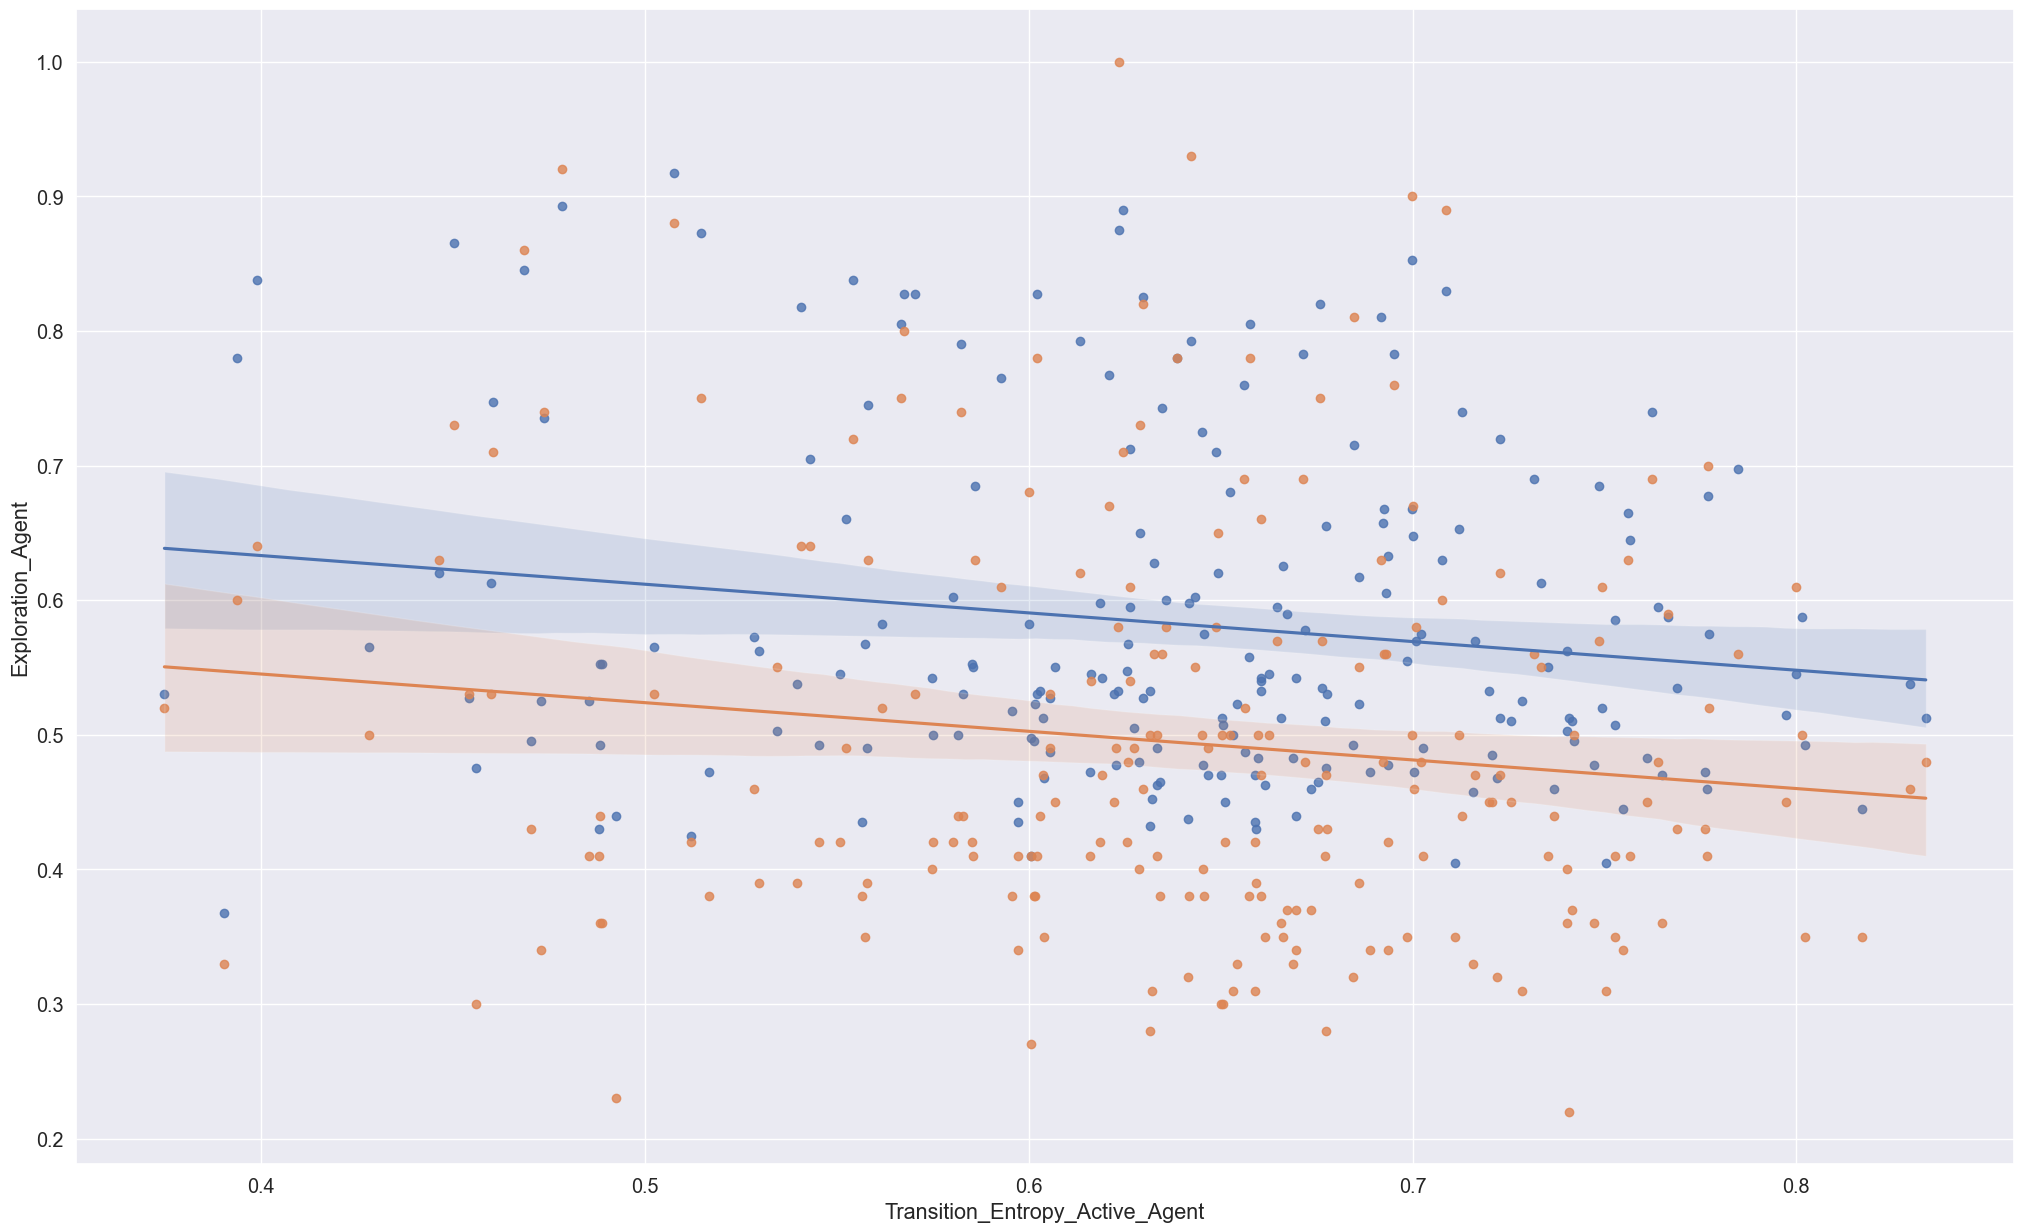

In [51]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)

In [52]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                    1.458158   
1          1031         2             2                    2.481094   
2          1031         3             2                    5.283813   
3          1031         4             2                    8.451983   
4          1031         5             2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                      3.769231                    0.435381   
1                      4.500000                    0.423716   
2                     10.875000                    0.473820   
3                     17.000000                    0.493701   
4                     12.714286                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [53]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                    1.458158   
1          1031         2             2                    2.481094   
2          1031         3             2                    5.283813   
3          1031         4             2                    8.451983   
4          1031         5             2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                      3.769231                    0.435381   
1                      4.500000                    0.423716   
2                     10.875000                    0.473820   
3                     17.000000                    0.493701   
4                     12.714286                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [54]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                    1.458158   
1          1031         2             2                    2.481094   
2          1031         3             2                    5.283813   
3          1031         4             2                    8.451983   
4          1031         5             2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                      3.769231                    0.435381   
1                      4.500000                    0.423716   
2                     10.875000                    0.473820   
3                     17.000000                    0.493701   
4                     12.714286                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [55]:
combined_data_fixations_Agent = combined_data_fixations[['ParticipantID', 'SessionNr','Transition_Entropy_Passive_Agent', 'Transition_Entropy_Active_Agent']].copy()

In [56]:
combined_data_fixations_Agent.head()

ParticipantID SessionNr  Transition_Entropy_Passive_Agent  \
0          1031         1                          0.775604   
1          1031         2                          0.694067   
2          1031         3                          0.559687   
3          1031         4                          0.582637   
4          1031         5                          0.657741   

   Transition_Entropy_Active_Agent  
0                         0.613399  
1                         0.597323  
2                         0.454144  
3                         0.488316  
4                         0.470364

In [57]:

# Update the Group column to handle Passive Agent correctly
combined_data_fixations_Agent['Group'] = combined_data_fixations_Agent.apply(
    lambda row: row['Agent_Type'] if row['Agent_Type'] == 'Passive Agent' else f"{row['Agent_Type']} - {row['Condition']}", axis=1
)

# Plot the distribution of Agent Entropy with Congruent/Incongruent distinction
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=combined_data_fixations_Agent,
    x="Agent_Entropy",
    hue="Group",
    fill=True,
    common_norm=False,
    palette={
        "Passive Agent": "#1f77b4",
        "Active Agent - Congruent": "#d62728",
        "Active Agent - Incongruent": "#ff7f7f"
    }
)

# Set plot titles and labels
plt.title("Distribution of Agent Entropy by Agent Type and Condition")
plt.xlabel("Agent Entropy")
plt.ylabel("Density")

# Save the plot
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Agent_Entropy_Distribution_by_Condition.png", dpi=300, bbox_inches="tight")
plt.show()


KeyError: 'Agent_Type'

In [ ]:
combined_data_fixations_Agent.head()

In [ ]:

from scipy.stats import pearsonr

# Function to calculate the correlation matrix with significance masking
def calculate_significant_correlations(df, alpha=0.05):
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
    
    # Calculate p-values
    for row in df.columns:
        for col in df.columns:
            if row != col:
                _, p_value = pearsonr(df[row].dropna(), df[col].dropna())
                p_matrix.at[row, col] = p_value

    # Mask non-significant correlations
    mask = p_matrix > alpha
    corr_matrix[mask] = np.nan
    return corr_matrix

# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for Active_Agent and Passive_Agent, excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Further separate Active_Agent by `Condition`
filtered_active_congruent = filtered_active[filtered_active['Condition'] == 'Congruent']
filtered_active_incongruent = filtered_active[filtered_active['Condition'] == 'Incongruent']

# Create a figure for plotting dwelling time distributions
fig, axes = plt.subplots(1, 3, figsize=(28, 8))  # One row, three columns for Passive, Congruent, Incongruent

# Plot the Passive_Agent dwelling time distribution
sns.histplot(filtered_passive['Dwelling_Time'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Passive Agent - Dwelling Time Distribution')
axes[0].set_xlabel('Dwelling Time')
axes[0].set_ylabel('Frequency')

# Plot the Congruent condition dwelling time distribution
sns.histplot(filtered_active_congruent['Dwelling_Time'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Active Agent - Congruent Condition - Dwelling Time Distribution')
axes[1].set_xlabel('Dwelling Time')
axes[1].set_ylabel('Frequency')

# Plot the Incongruent condition dwelling time distribution
sns.histplot(filtered_active_incongruent['Dwelling_Time'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Active Agent - Incongruent Condition - Dwelling Time Distribution')
axes[2].set_xlabel('Dwelling Time')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
# Save the figure before displaying
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Dwelling_Time_Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
def create_palette(colormap_name, indices):
    try:
        colormap = plt.get_cmap(colormap_name)
        palette = colormap(indices)
        return palette
    except ValueError:
        print(f"Colormap '{colormap_name}' is not found.")
        return None

def display_palette(palette, title):
    if palette is not None:
        sns.palplot(palette)
        plt.title(title)
    else:
        print(f"Palette for '{title}' could not be displayed.")

num_colors = 200
color_indices = np.linspace(0, 1, num_colors)
selected_indices = list(range(0, 200, 10))

# Dictionary to store palettes
palettes = {}

# Create palettes for each colormap
for colormap_name in ['cmc.bukavu','cmc.vik','cmc.managua','cmc.lipari', 'cmc.berlin','cmc.roma', 'cividis', 'viridis']:
    palettes[colormap_name] = create_palette(colormap_name, color_indices[selected_indices])

In [ ]:
palettes['cmc.roma']

In [ ]:
Corr = combined_data_fixations[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()